Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
#anltdate="2020-12-11"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

2020-12-15
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+-------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
#
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

2020-12-15
root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

2020-12-15


### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-12-15  Afghanistan_nan         0         191.0         602.0   
1  2020-12-15      Albania_nan         0         661.0        2328.0   
2  2020-12-15      Algeria_nan         0         495.0        1476.0   
3  2020-12-15      Andorra_nan         0          44.0         146.0   
4  2020-12-15       Angola_nan         0          89.0         216.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1202.0              48718.0               48853.0  35530000.0   
1        5508.0              49191.0               50060.0   2878445.0   
2        3772.0              92597.0               93185.0  41320000.0   
3         298.0               7382.0                7420.0     77239.0   
4         629.0              16277.0               16379.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001371   
1                                       0.017090   
2                                       0.002241   
3                                       0.095585   
4                                       0.000495   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.013712                    135.0   
1                                           0.170898                    869.0   
2                                           0.022410                    588.0   
3                                           0.955852                     38.0   
4                                           0.004953                    102.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    3.799606             171.714279   
1                  301.899109             786.857117   
2                   14.230397             538.857117   
3                  491.979431              42.571430   
4                    3.103486              89.857140   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           6.766113      
1                                         382.706635      
2                                          18.257502      
3                                         771.630920      
4                                           3.827632

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {analytics_date} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [7]:
print(configs)

{'analytics_date': '2020-12-15', 'a': 1}


In [8]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {a} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2020-12-15         United States_nan          215424.000000   
1   2020-12-15                Turkey_nan          143701.859375   
2   2020-12-15                Brazil_nan           43319.144531   
3   2020-12-15                 India_nan           28913.572266   
4   2020-12-15                Russia_nan           27091.427734   
5   2020-12-15               Germany_nan           22465.000000   
6   2020-12-15        United Kingdom_nan           18815.142578   
7   2020-12-15                 Italy_nan           16168.571289   
8   2020-12-15                France_nan           11850.713867   
9   2020-12-15               Ukraine_nan           11631.857422   
10  2020-12-15                Mexico_nan           10532.142578   
11  2020-12-15                Poland_nan           10386.000000   
12  2020-12-15                  Iran_nan            9199.428711   
13  2020-12-15           Netherlands_nan            8236.142578   
14  2020-12-15              Colombia_nan            8202.286133   
15  2020-12-15                 Spain_nan            7079.428711   
16  2020-12-15          South Africa_nan            6892.714355   
17  2020-12-15                Serbia_nan            6450.714355   
18  2020-12-15               Romania_nan            6050.143066   
19  2020-12-15             Indonesia_nan            5965.571289   
20  2020-12-15                Sweden_nan            5883.714355   
21  2020-12-15             Argentina_nan            5273.285645   
22  2020-12-15               Czechia_nan            4892.285645   
23  2020-12-15           Switzerland_nan            4321.571289   
24  2020-12-15               Hungary_nan            4246.000000   
25  2020-12-15            Azerbaijan_nan            4174.428711   
26  2020-12-15               Georgia_nan            3726.714355   
27  2020-12-15              Portugal_nan            3695.285645   
28  2020-12-15               Croatia_nan            3588.428467   
29  2020-12-15               Denmark_nan            2920.857178   
30  2020-12-15              Pakistan_nan            2866.714355   
31  2020-12-15               Morocco_nan            2805.428467   
32  2020-12-15               Austria_nan            2765.428467   
33  2020-12-15             Lithuania_nan            2712.142822   
34  2020-12-15                Jordan_nan            2629.714355   
35  2020-12-15                 Japan_nan            2553.857178   
36  2020-12-15              Bulgaria_nan            2479.857178   
37  2020-12-15               Belgium_nan            2370.857178   
38  2020-12-15              Slovakia_nan            2315.142822   
39  2020-12-15                Panama_nan            2198.428467   
40  2020-12-15            Canada_Ontario            1904.428589   
41  2020-12-15               Belarus_nan            1885.000000   
42  2020-12-15                Israel_nan            1815.571411   
43  2020-12-15            Bangladesh_nan            1798.428589   
44  2020-12-15             Canada_Quebec            1765.571411   
45  2020-12-15                 Chile_nan            1669.714233   
46  2020-12-15            Canada_Alberta            1669.285767   
47  2020-12-15    West Bank and Gaza_nan            1620.571411   
48  2020-12-15                  Peru_nan            1580.142822   
49  2020-12-15              Malaysia_nan            1507.428589   
50  2020-12-15              Slovenia_nan            1493.857178   
51  2020-12-15                  Iraq_nan            1422.428589   
52  2020-12-15               Moldova_nan            1394.000000   
53  2020-12-15               Lebanon_nan            1359.571411   
54  2020-12-15           Philippines_nan            1333.428589   
55  2020-12-15                 Burma_nan            1297.285767   
56  2020-12-15  United Arab Emirates_nan            1209.142822   
57  2020-12-15                Greece_nan            1207.428589   
58  2020-12-15                 Nepal_nan            1035.

In [11]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-12-15           United States_nan          215424.000000   
1   2020-12-15                  Turkey_nan          143701.859375   
2   2020-12-15                  Brazil_nan           43319.144531   
3   2020-12-15                  Russia_nan           27091.427734   
4   2020-12-15                 Germany_nan           22465.000000   
5   2020-12-15          United Kingdom_nan           18815.142578   
6   2020-12-15                   Italy_nan           16168.571289   
7   2020-12-15                  France_nan           11850.713867   
8   2020-12-15                 Ukraine_nan           11631.857422   
9   2020-12-15                  Mexico_nan           10532.142578   
10  2020-12-15                  Poland_nan           10386.000000   
11  2020-12-15                    Iran_nan            9199.428711   
12  2020-12-15             Netherlands_nan            8236.142578   
13  2020-12-15                Colombia_nan            8202.286133   
14  2020-12-15                   Spain_nan            7079.428711   
15  2020-12-15            South Africa_nan            6892.714355   
16  2020-12-15                  Serbia_nan            6450.714355   
17  2020-12-15                 Romania_nan            6050.143066   
18  2020-12-15                  Sweden_nan            5883.714355   
19  2020-12-15               Argentina_nan            5273.285645   
20  2020-12-15                 Czechia_nan            4892.285645   
21  2020-12-15             Switzerland_nan            4321.571289   
22  2020-12-15                 Hungary_nan            4246.000000   
23  2020-12-15              Azerbaijan_nan            4174.428711   
24  2020-12-15                 Georgia_nan            3726.714355   
25  2020-12-15                Portugal_nan            3695.285645   
26  2020-12-15                 Croatia_nan            3588.428467   
27  2020-12-15                 Denmark_nan            2920.857178   
28  2020-12-15                 Morocco_nan            2805.428467   
29  2020-12-15                 Austria_nan            2765.428467   
..         ...                         ...                    ...   
43  2020-12-15                Slovenia_nan            1493.857178   
44  2020-12-15                 Moldova_nan            1394.000000   
45  2020-12-15                 Lebanon_nan            1359.571411   
46  2020-12-15    United Arab Emirates_nan            1209.142822   
47  2020-12-15                  Greece_nan            1207.428589   
48  2020-12-15                 Tunisia_nan            1004.571411   
49  2020-12-15              Costa Rica_nan             964.000000   
50  2020-12-15  Bosnia and Herzegovina_nan             931.000000   
51  2020-12-15                 Armenia_nan             905.428589   
52  2020-12-15      Dominican Republic_nan             863.714294   
53  2020-12-15         North Macedonia_nan             788.428589   
54  2020-12-15                 Albania_nan             786.857117   
55  2020-12-15                Paraguay_nan             785.714294   
56  2020-12-15     Canada_British Columbia             684.428589   
57  2020-12-15                  Latvia_nan             623.571411   
58  2020-12-15                   Libya_nan             608.571411   
59  2020-12-15                  Kosovo_nan             512.142883   
60  2020-12-15              Luxembourg_nan             489.142853   
61  2020-12-15              Montenegro_nan             463.000000   
62  2020-12-15                 Finland_nan             461.285706   
63  2020-12-15                 Estonia_nan             451.285706   
64  2020-12-15                  Norway_nan             375.857147   
65  2020-12-15                  Cyprus_nan             369.000000   
66  2020-12-15                 Uruguay_nan             360.571442   
67  2020-12-15             Canada_Manitoba             304.714294   
68  2020-12-15                 Ireland_nan             283.000000   
69  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [12]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-12-15           United States_nan          215424.000000   
1   2020-12-15                  Turkey_nan          143701.859375   
2   2020-12-15                  Brazil_nan           43319.144531   
3   2020-12-15                  Russia_nan           27091.427734   
4   2020-12-15                 Germany_nan           22465.000000   
5   2020-12-15          United Kingdom_nan           18815.142578   
6   2020-12-15                   Italy_nan           16168.571289   
7   2020-12-15                 Ukraine_nan           11631.857422   
8   2020-12-15                  Poland_nan           10386.000000   
9   2020-12-15             Netherlands_nan            8236.142578   
10  2020-12-15                  Serbia_nan            6450.714355   
11  2020-12-15                 Romania_nan            6050.143066   
12  2020-12-15                  Sweden_nan            5883.714355   
13  2020-12-15                 Czechia_nan            4892.285645   
14  2020-12-15             Switzerland_nan            4321.571289   
15  2020-12-15                 Hungary_nan            4246.000000   
16  2020-12-15              Azerbaijan_nan            4174.428711   
17  2020-12-15                 Georgia_nan            3726.714355   
18  2020-12-15                Portugal_nan            3695.285645   
19  2020-12-15                 Croatia_nan            3588.428467   
20  2020-12-15                 Denmark_nan            2920.857178   
21  2020-12-15                 Austria_nan            2765.428467   
22  2020-12-15               Lithuania_nan            2712.142822   
23  2020-12-15                  Jordan_nan            2629.714355   
24  2020-12-15                Bulgaria_nan            2479.857178   
25  2020-12-15                 Belgium_nan            2370.857178   
26  2020-12-15                Slovakia_nan            2315.142822   
27  2020-12-15                  Panama_nan            2198.428467   
28  2020-12-15                 Belarus_nan            1885.000000   
29  2020-12-15                  Israel_nan            1815.571411   
30  2020-12-15               Canada_Quebec            1765.571411   
31  2020-12-15              Canada_Alberta            1669.285767   
32  2020-12-15      West Bank and Gaza_nan            1620.571411   
33  2020-12-15                Slovenia_nan            1493.857178   
34  2020-12-15                 Moldova_nan            1394.000000   
35  2020-12-15                 Lebanon_nan            1359.571411   
36  2020-12-15              Costa Rica_nan             964.000000   
37  2020-12-15  Bosnia and Herzegovina_nan             931.000000   
38  2020-12-15                 Armenia_nan             905.428589   
39  2020-12-15         North Macedonia_nan             788.428589   
40  2020-12-15                 Albania_nan             786.857117   
41  2020-12-15                  Latvia_nan             623.571411   
42  2020-12-15                  Kosovo_nan             512.142883   
43  2020-12-15              Luxembourg_nan             489.142853   
44  2020-12-15              Montenegro_nan             463.000000   
45  2020-12-15                 Estonia_nan             451.285706   
46  2020-12-15                  Cyprus_nan             369.000000   
47  2020-12-15             Canada_Manitoba             304.714294   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          911.151611          193454.0   
1                                         2489.575439           29617.0   
2                                          285.317474           25193.0   
3                                          262.477509           26902.0   
4                                          379.888885            6451.0   
5                                          396.465973           20263.0   
6                                          374.272491           12025.0   
7                           

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-12-15                France_nan           11850.713867   
1   2020-12-15                  Iran_nan            9199.428711   
2   2020-12-15              Colombia_nan            8202.286133   
3   2020-12-15                 Spain_nan            7079.428711   
4   2020-12-15          South Africa_nan            6892.714355   
5   2020-12-15             Argentina_nan            5273.285645   
6   2020-12-15            Canada_Ontario            1904.428589   
7   2020-12-15                 Chile_nan            1669.714233   
8   2020-12-15  United Arab Emirates_nan            1209.142822   
9   2020-12-15                Greece_nan            1207.428589   
10  2020-12-15              Paraguay_nan             785.714294   
11  2020-12-15   Canada_British Columbia             684.428589   
12  2020-12-15                 Libya_nan             608.571411   
13  2020-12-15               Uruguay_nan             360.571442   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          237.048157            2960.0   
1                                          153.336594            7501.0   
2                                          226.198837            8742.0   
3                                          212.413208           21309.0   
4                                          163.144821            5163.0   
5                                          163.669693            5062.0   
6                                          182.992447            2194.0   
7                                          122.509216            1911.0   
8                                          180.085114            1092.0   
9                                          157.392929             639.0   
10                                         154.675735             641.0   
11                                         187.882355            2146.0   
12                                         123.994148             578.0   
13                                         145.427307             321.0   

    3_day_change  7_day_change  confirmed_yesterday  population  \
0        28317.0       82955.0            2377112.0  69990000.0   
1        23363.0       64396.0            1115770.0  83993000.0   
2        25607.0       57416.0            1434516.0  50765952.0   
3        21309.0       49556.0            1751884.0  46660000.0   
4        21044.0       48249.0             866127.0  59148672.0   
5        13894.0       36913.0            1503222.0  45106700.0   
6         5747.0       13331.0             146067.0  14570000.0   
7         5856.0       11688.0             573830.0  19081012.0   
8         3440.0        8464.0             186041.0   9400000.0   
9         2525.0        8452.0             125173.0  10740000.0   
10        2110.0        5500.0              94223.0   7111652.0   
11        2146.0        4791.0              42943.0   5100000.0   
12        1477.0        4260.0              91357.0   6871292.0   
13        1180.0        2524.0              10029.0   3471150.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.339636           
1                                            0.132841           
2                                            0.282575           
3                                            0.375458           
4                                            0.146432           
5                                            0.333259           
6                                            0.100253           
7                                            0.300734           
8                                            0.197917           
9                                            0.116549           
10                                           0.132492           
11                                           0.084204           
12                         

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-12-15              Mexico_nan           10532.142578   
1  2020-12-15             Morocco_nan            2805.428467   
2  2020-12-15             Tunisia_nan            1004.571411   
3  2020-12-15  Dominican Republic_nan             863.714294   
4  2020-12-15             Finland_nan             461.285706   
5  2020-12-15              Norway_nan             375.857147   
6  2020-12-15             Ireland_nan             283.000000   
7  2020-12-15              Kuwait_nan             264.285706   
8  2020-12-15             Namibia_nan             215.285721   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         114.621490            5930.0   
1                                         106.678612            1217.0   
2                                         119.267624               0.0   
3                                         111.709610             492.0   
4                                         117.141304             300.0   
5                                          98.226616             331.0   
6                                          80.432381             264.0   
7                                          89.436790             231.0   
8                                         118.619156             190.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       26595.0       73725.0            1255974.0  128640792.0   
1        6262.0       19638.0             400826.0   36817128.0   
2        2257.0        7032.0             111361.0   11791968.0   
3        2732.0        6046.0             155184.0   10824494.0   
4        1037.0        3229.0              31110.0    5513000.0   
5         895.0        2631.0              41334.0    5357000.0   
6         942.0        1981.0              76449.0    4925877.0   
7         660.0        1850.0             146449.0    4137000.0   
8         629.0        1507.0              16726.0    2540905.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.097634                  13289.0   
1                                           0.108870                   3858.0   
2                                           0.094439                   1574.0   
3                                           0.143365                   1057.0   
4                                           0.056432                    582.0   
5                                           0.077161                    436.0   
6                                           0.155201                    268.0   
7                                           0.354000                    298.0   
8                                           0.065831                    227.0   

   delta_new_cases_per_1M_hab  
0                  103.303154  
1                  104.788185  
2                  133.480682  
3                   97.648903  
4                  105.568657  
5                   81.388840  
6                   54.406555  
7                   72.032875  
8                   89.338249

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [15]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-12-15                    Oman_nan             198.428574   
1   2020-12-15             Afghanistan_nan             171.714279   
2   2020-12-15            Saudi Arabia_nan             155.857147   
3   2020-12-15              Uzbekistan_nan             148.714279   
4   2020-12-15                   Qatar_nan             147.857147   
5   2020-12-15            Burkina Faso_nan             127.714287   
6   2020-12-15                Botswana_nan             116.428574   
7   2020-12-15                   Syria_nan             116.000000   
8   2020-12-15                   Ghana_nan             105.714287   
9   2020-12-15              Mozambique_nan              96.571426   
10  2020-12-15             China_Hong Kong              92.571426   
11  2020-12-15                  Angola_nan              89.857140   
12  2020-12-15                 Jamaica_nan              86.857140   
13  2020-12-15                 Senegal_nan              84.714287   
14  2020-12-15                    Cuba_nan              83.714287   
15  2020-12-15                    Mali_nan              78.000000   
16  2020-12-15                Zimbabwe_nan              74.142860   
17  2020-12-15                Cameroon_nan              66.000000   
18  2020-12-15                   Niger_nan              61.142857   
19  2020-12-15              France_Reunion              34.285713   
20  2020-12-15           Cote d'Ivoire_nan              28.285715   
21  2020-12-15                Thailand_nan              17.142857   
22  2020-12-15                 Iceland_nan               9.714286   
23  2020-12-15           France_Martinique               7.857143   
24  2020-12-15               Singapore_nan               7.428571   
25  2020-12-15               Nicaragua_nan               7.000000   
26  2020-12-15              China_Shanghai               6.428571   
27  2020-12-15                 Vietnam_nan               5.000000   
28  2020-12-15   Australia_New South Wales               4.285714   
29  2020-12-15                 Taiwan*_nan               3.428571   
30  2020-12-15               China_Sichuan               2.571429   
31  2020-12-15                Cambodia_nan               1.714286   
32  2020-12-15             China_Guangdong               1.571429   
33  2020-12-15          China_Heilongjiang               1.571429   
34  2020-12-15             New Zealand_nan               1.571429   
35  2020-12-15        Australia_Queensland               1.000000   
36  2020-12-15          Australia_Victoria               1.000000   
37  2020-12-15        China_Inner Mongolia               0.857143   
38  2020-12-15               China_Beijing               0.571429   
39  2020-12-15               China_Jiangsu               0.571429   
40  2020-12-15                China_Yunnan               0.428571   
41  2020-12-15  United Kingdom_Isle of Man               0.428571   
42  2020-12-15                China_Fujian               0.285714   
43  2020-12-15              China_Zhejiang               0.285714   
44  2020-12-15   Australia_South Australia               0.142857   
45  2020-12-15               China_Guangxi               0.142857   
46  2020-12-15              China_Shandong               0.142857   
47  2020-12-15               China_Tianjin               0.142857   
48  2020-12-15                 China_Anhui               0.000000   
49  2020-12-15             China_Chongqing               0.000000   
50  2020-12-15                 China_Gansu               0.000000   
51  2020-12-15               China_Guizhou               0.000000   
52  2020-12-15                China_Hainan               0.000000   
53  2020-12-15                 China_Hebei               0.000000   
54  2020-12-15                 China_Henan               0.000000   
55  2020-12-15                 China_Hubei               0.000000   
56  2020-12-15                 China_Hunan               0.000000   
57  2020

In [16]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                                      region  \
0   2020-12-15                                    Oman_nan   
1   2020-12-15                             Afghanistan_nan   
2   2020-12-15                            Saudi Arabia_nan   
3   2020-12-15                              Uzbekistan_nan   
4   2020-12-15                                   Qatar_nan   
5   2020-12-15                            Burkina Faso_nan   
6   2020-12-15                                Botswana_nan   
7   2020-12-15                                   Syria_nan   
8   2020-12-15                                   Ghana_nan   
9   2020-12-15                              Mozambique_nan   
10  2020-12-15                             China_Hong Kong   
11  2020-12-15                                  Angola_nan   
12  2020-12-15                                 Jamaica_nan   
13  2020-12-15                                 Senegal_nan   
14  2020-12-15                                    Cuba_nan   
15  2020-12-15                                    Mali_nan   
16  2020-12-15                                Zimbabwe_nan   
17  2020-12-15                                Cameroon_nan   
18  2020-12-15                                   Niger_nan   
19  2020-12-15                              France_Reunion   
20  2020-12-15                           Cote d'Ivoire_nan   
21  2020-12-15                                Thailand_nan   
22  2020-12-15                                 Iceland_nan   
23  2020-12-15                           France_Martinique   
24  2020-12-15                               Singapore_nan   
25  2020-12-15                               Nicaragua_nan   
26  2020-12-15                              China_Shanghai   
27  2020-12-15                                 Vietnam_nan   
28  2020-12-15                   Australia_New South Wales   
29  2020-12-15                                 Taiwan*_nan   
..         ...                                         ...   
40  2020-12-15                                China_Yunnan   
41  2020-12-15                  United Kingdom_Isle of Man   
42  2020-12-15                                China_Fujian   
43  2020-12-15                              China_Zhejiang   
44  2020-12-15                   Australia_South Australia   
45  2020-12-15                               China_Guangxi   
46  2020-12-15                              China_Shandong   
47  2020-12-15                               China_Tianjin   
48  2020-12-15                                 China_Anhui   
49  2020-12-15                             China_Chongqing   
50  2020-12-15                                 China_Gansu   
51  2020-12-15                               China_Guizhou   
52  2020-12-15                                China_Hainan   
53  2020-12-15                                 China_Hebei   
54  2020-12-15                                 China_Henan   
55  2020-12-15                                 China_Hubei   
56  2020-12-15                                 China_Hunan   
57  2020-12-15                               China_Jiangxi   
58  2020-12-15                                 China_Jilin   
59  2020-12-15                              China_Liaoning   
60  2020-12-15                                 China_Macau   
61  2020-12-15                               China_Ningxia   
62  2020-12-15                               China_Qinghai   
63  2020-12-15                               China_Shaanxi   
64  2020-12-15                                China_Shanxi   
65  2020-12-15                                 China_Tibet   
66  2020-12-15                              China_Xinjiang   
67  2020-12-15                                Holy See_nan   
68  2020-12-15  United Kingdom_Falkland Islands (Malvinas)   
69  2020-12-15                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0              198.428574   
1              171.714279   
2              155.857147   
3              148.714279   
4              147.8

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [18]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [19]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-15' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

date                region confirmed  1_day_change  3_day_change  \
0  2020-12-15  Congo (Kinshasa)_nan         0          52.0         344.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         918.0              14513.0               14690.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001451   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.014514                    177.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                   17.700001             131.142853   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                          18.360001

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [20]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-12-15' and population in (10000000.0 ) order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                       Congo (Brazzaville)_nan
26                          Congo (Kinshasa)_nan
27                         Denmark_Faroe Islands
28                             Denmark_Greenland
29                          Diamond Princess_nan
..                                           ...
50                                      Laos_nan
51                                   Lesotho_nan
52                                   Liberia_nan
53                                MS Zaandam_nan
54                                Madagascar_nan
55                                    Malawi_nan
56                                  Maldives_nan
57                          Marshall Islands_nan
58                                 Mauritius_nan
59                                  Mongolia_nan
60                             Netherlands_Aruba
61  Netherlands_Bonaire, Sint Eustatius and Saba
62                      Netherlands_Sint Maarten
63                          Papua New Guinea_nan
64                                    Rwanda_nan
65                     Saint Kitts and Nevis_nan
66                               Saint Lucia_nan
67          Saint Vincent and the Grenadines_nan
68                                     Samoa_nan
69                     Sao Tome and Principe_nan
70                                Seychelles_nan
71                              Sierra Leone_nan
72                           Solomon Islands_nan
73                                   Somalia_nan
74                               South Sudan_nan
75                                  Suriname_nan
76                                Tajikistan_nan
77                                  Tanzania_nan
78                               Timor-Leste_nan
79                                      Togo_nan

[80 rows x 1 columns]

In [21]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-12-15' and region > 'Togo_nan' and
     population in (10000000.0 ) order by region asc

region
0                  Trinidad and Tobago_nan
1                  United Kingdom_Anguilla
2                   United Kingdom_Bermuda
3    United Kingdom_British Virgin Islands
4            United Kingdom_Cayman Islands
5  United Kingdom_Turks and Caicos Islands
6                              Vanuatu_nan
7                                Yemen_nan
8                               Zambia_nan

In [22]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [23]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-09-28' and  date <= '2020-12-15' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [24]:
sc.stop()

In [25]:
%matplotlib inline
##%matplotlib notebook

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


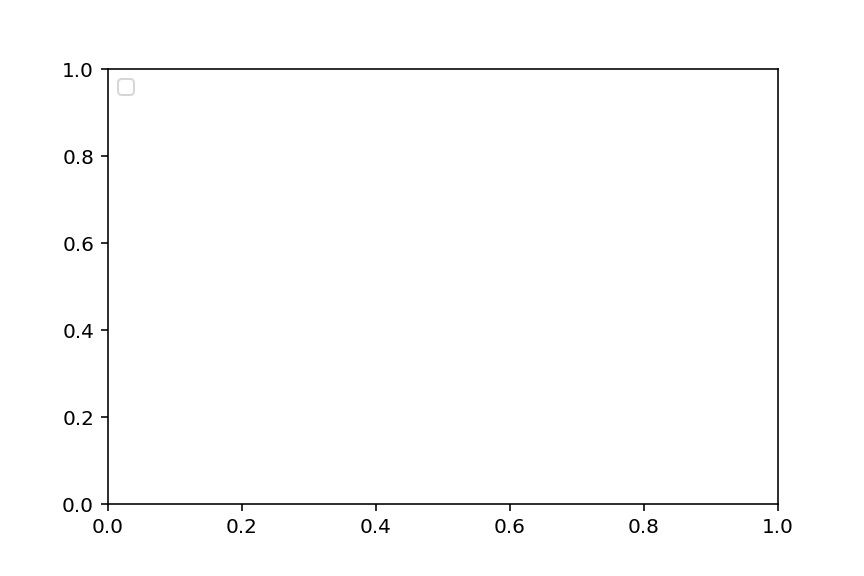

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


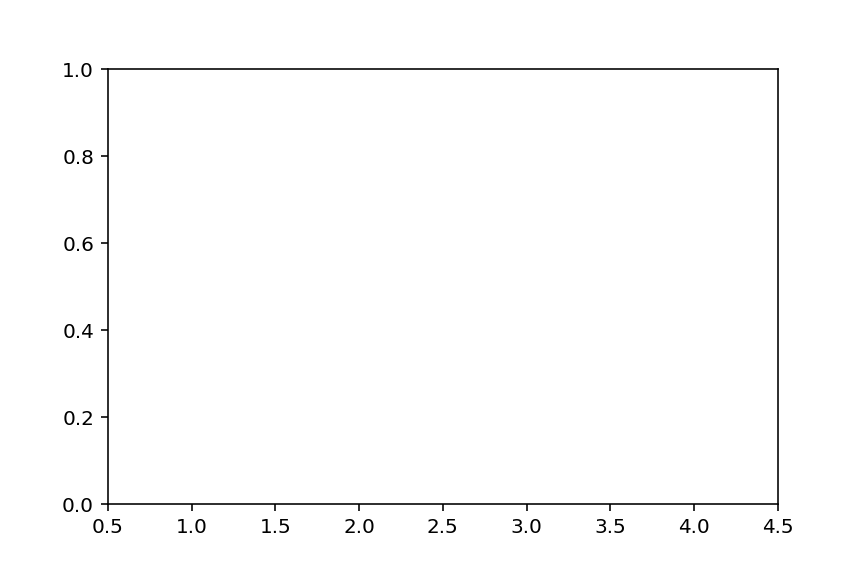

In [27]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


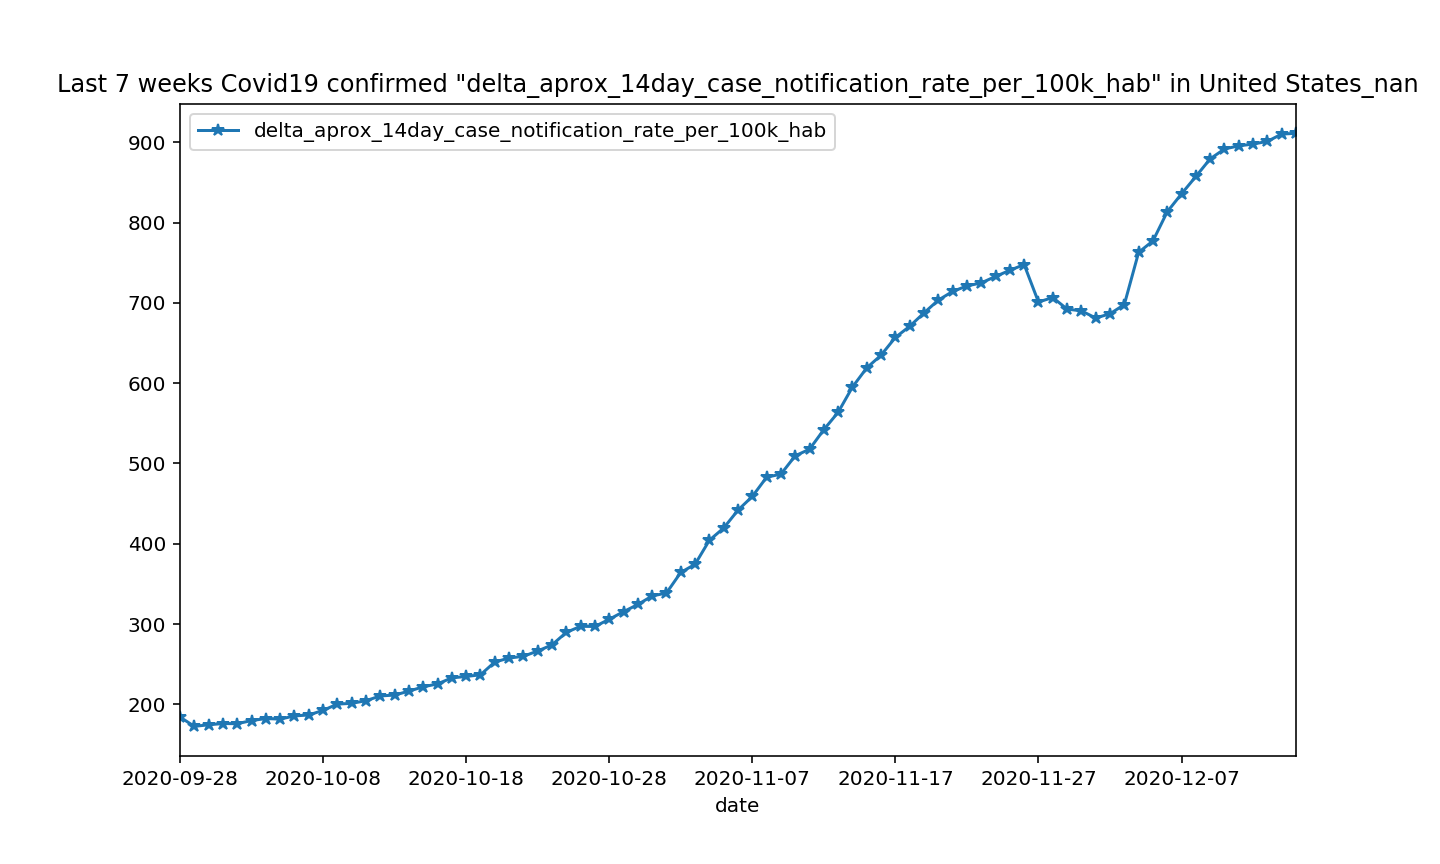

In [29]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


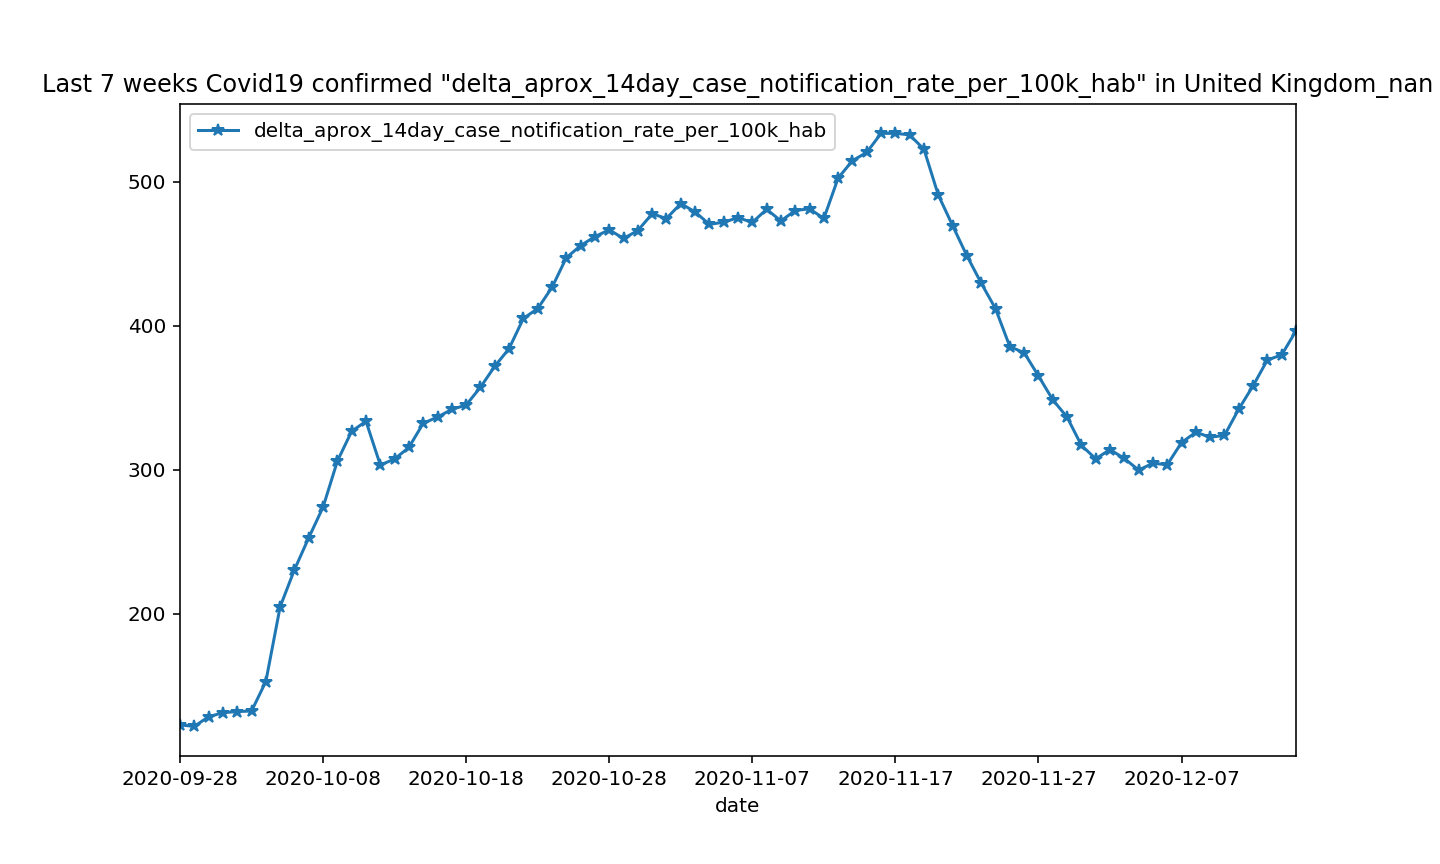

In [30]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


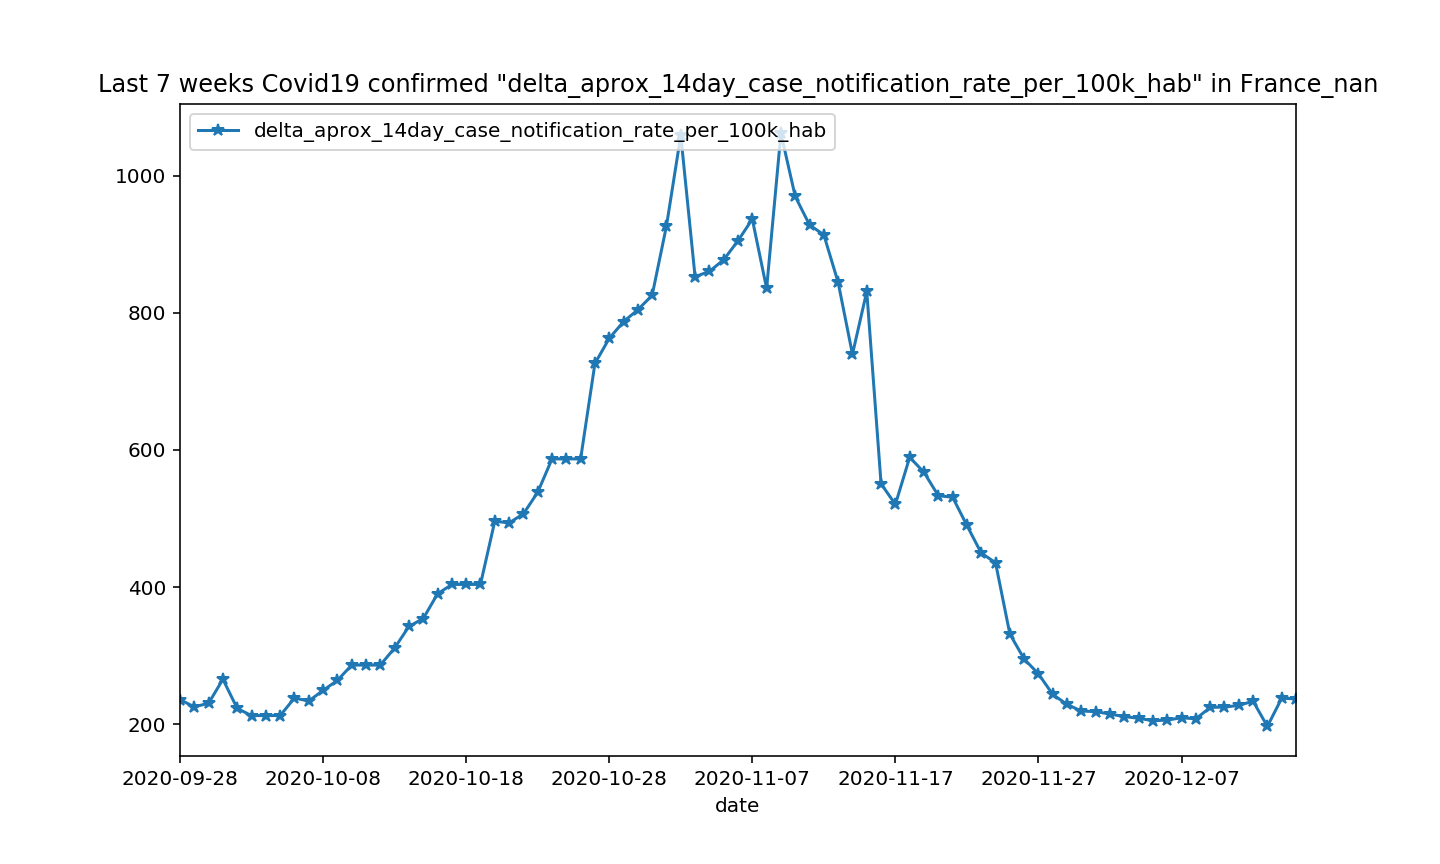

In [31]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


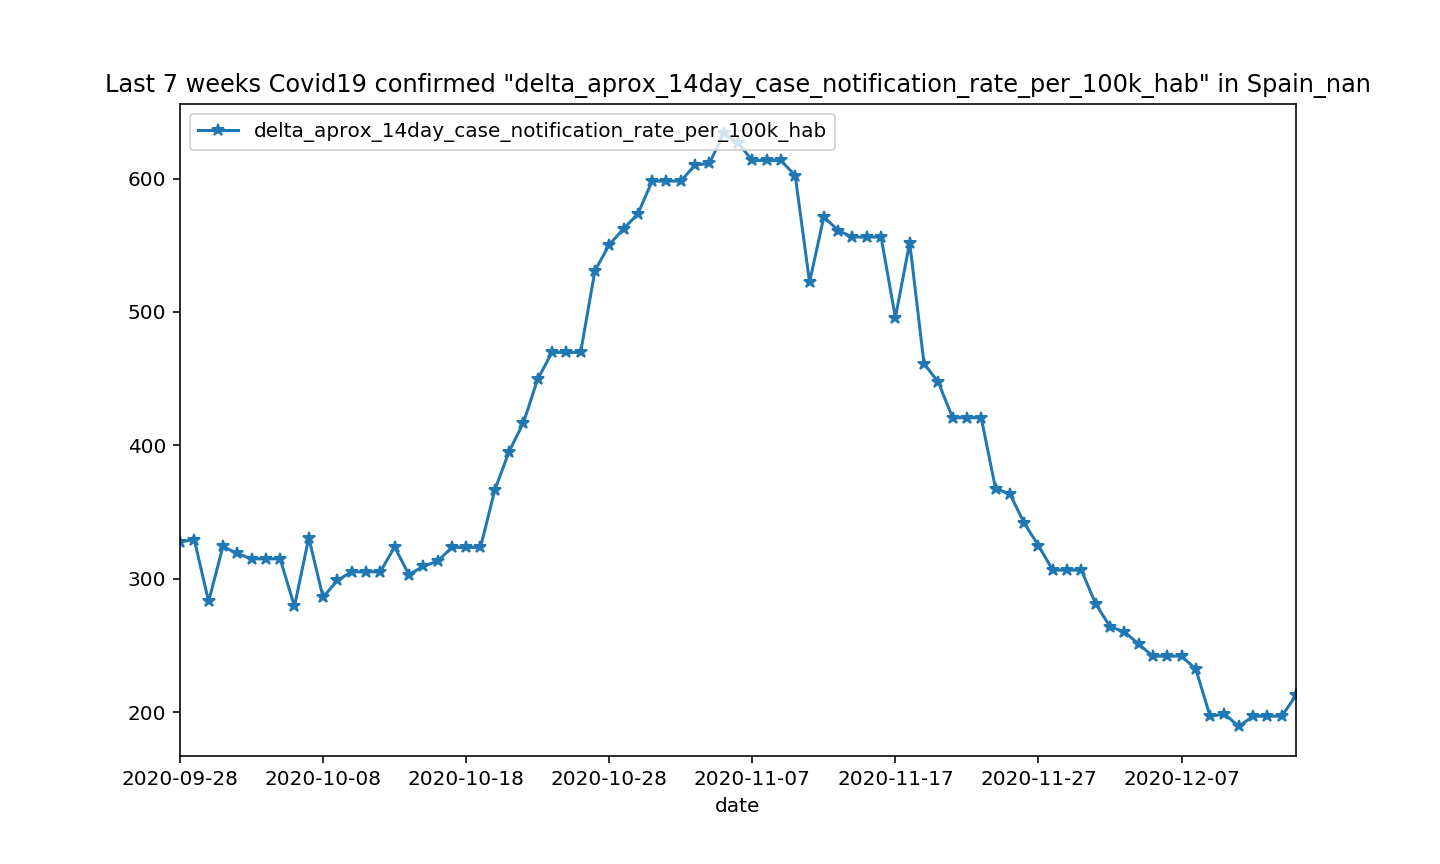

In [32]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


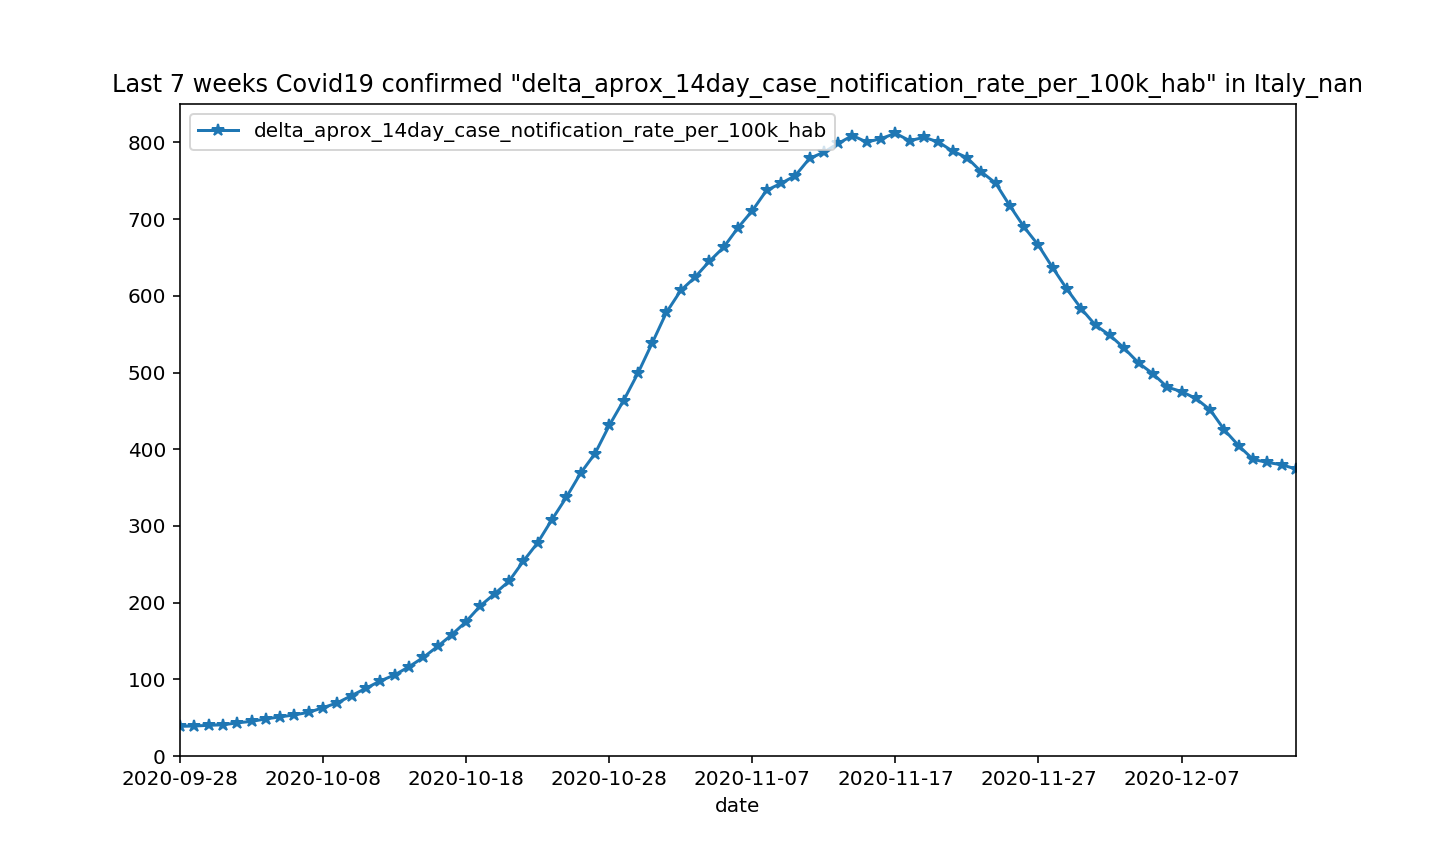

In [33]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


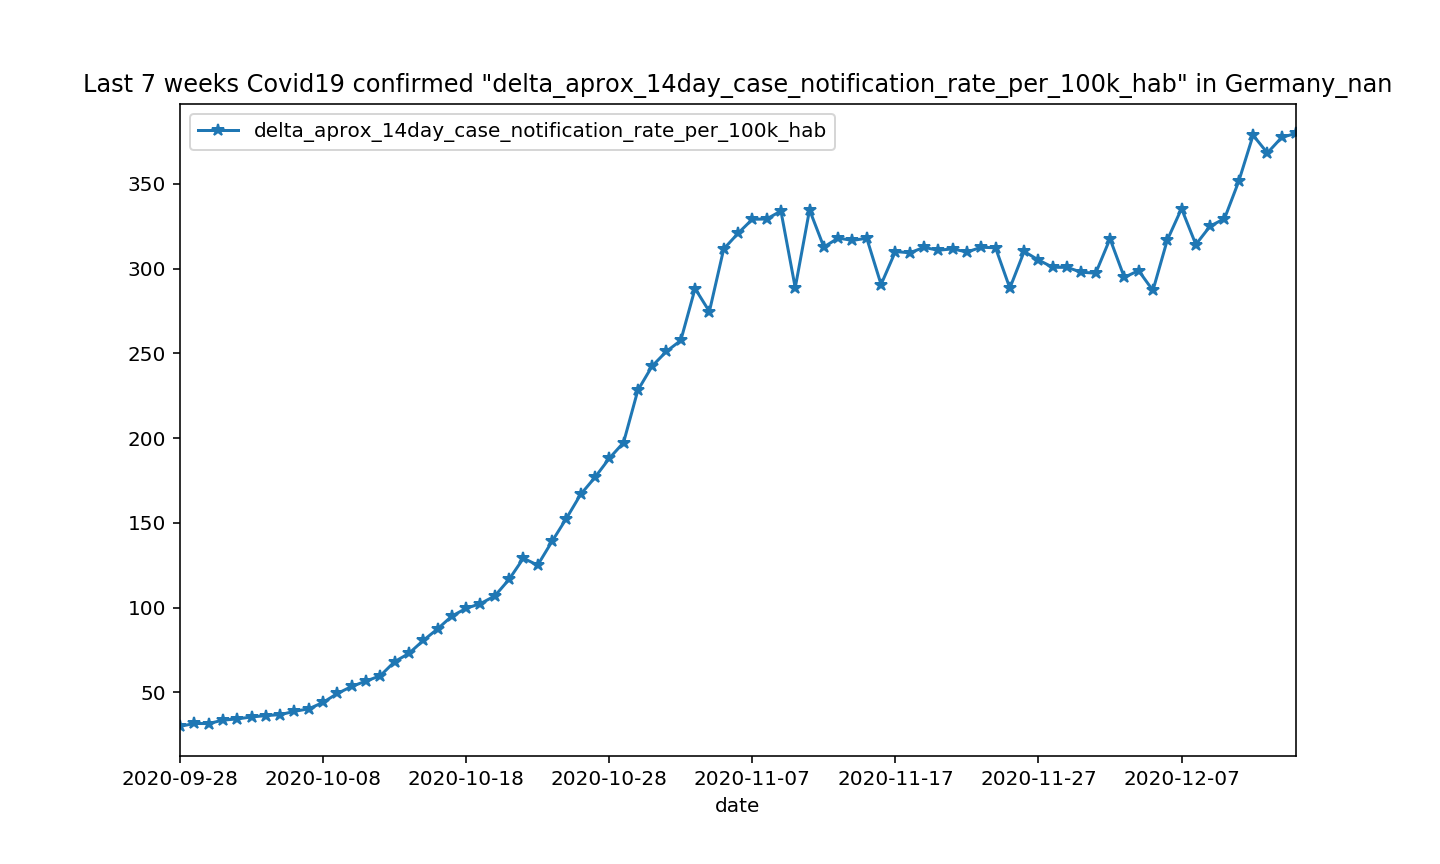

In [34]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


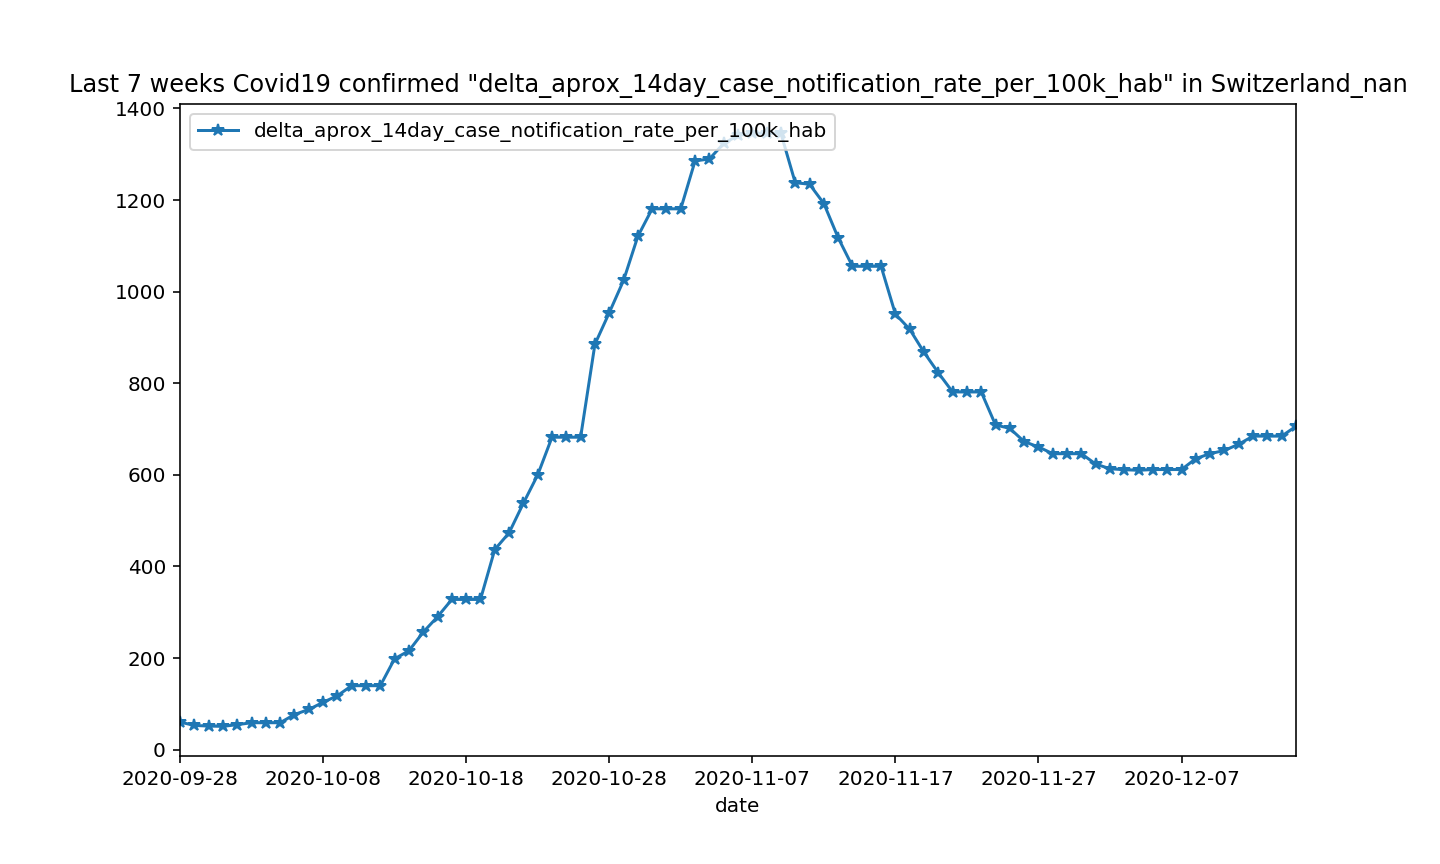

In [35]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


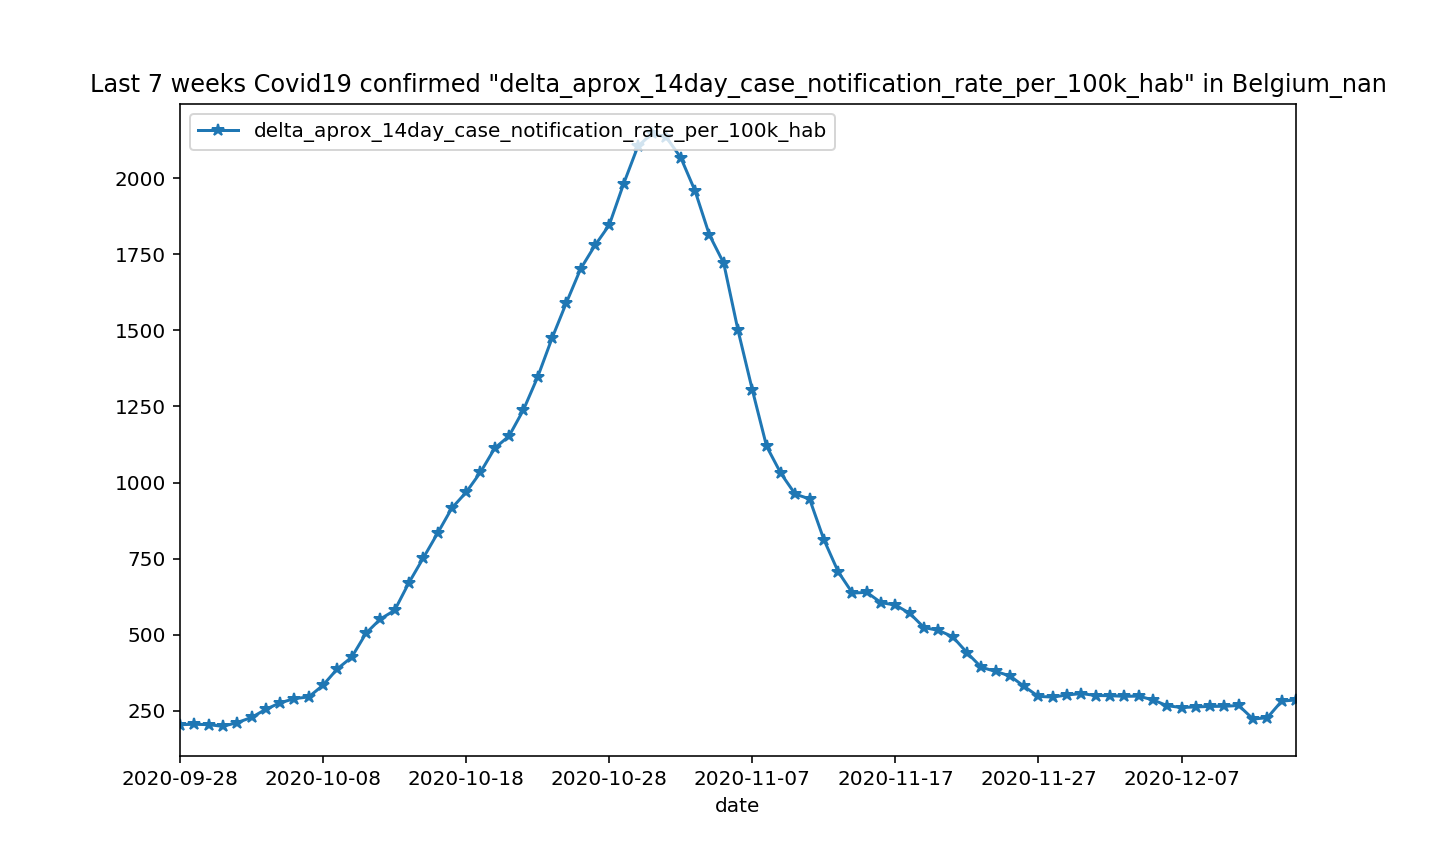

In [36]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


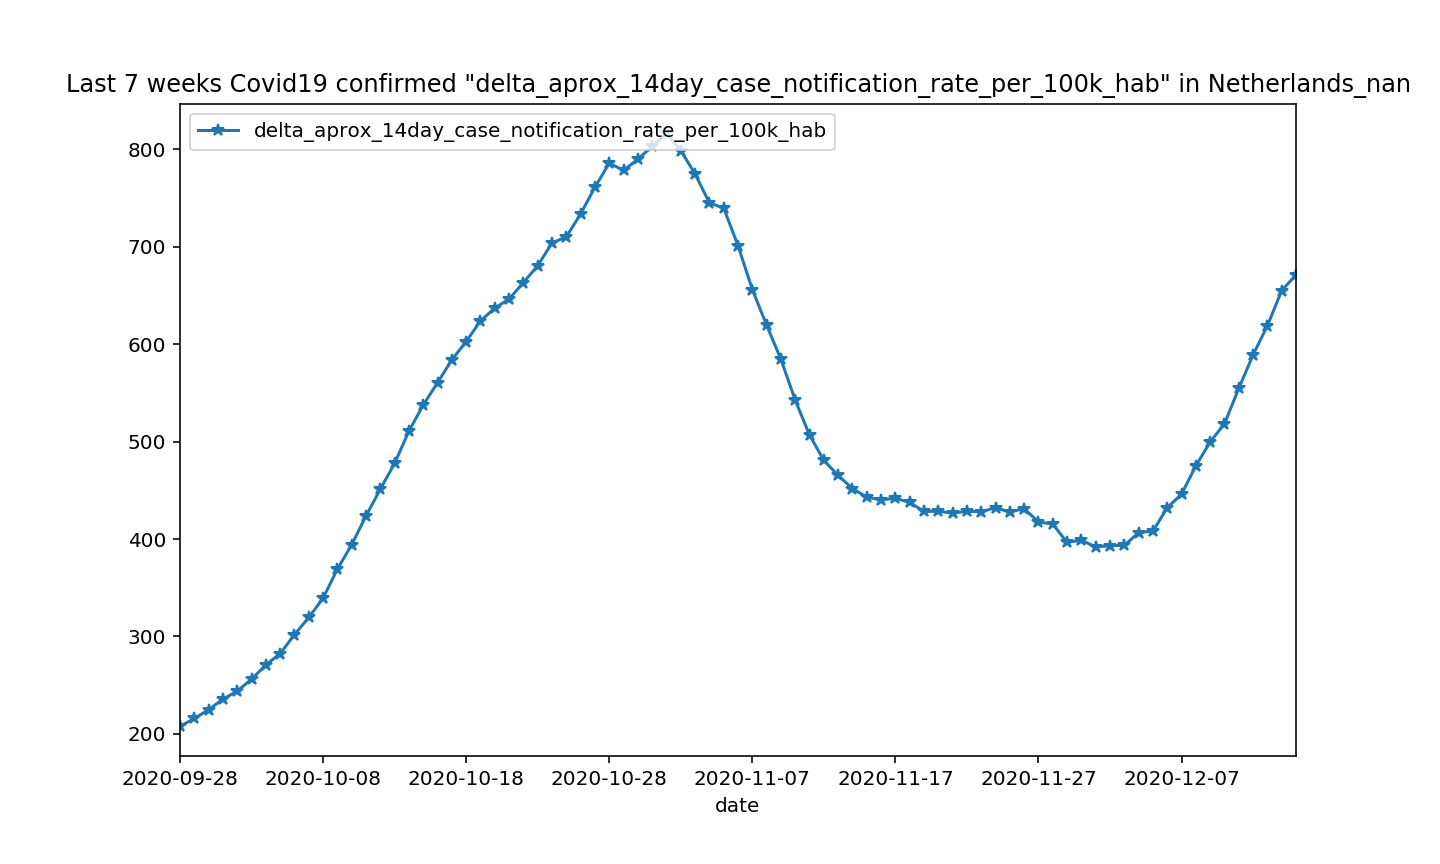

In [37]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


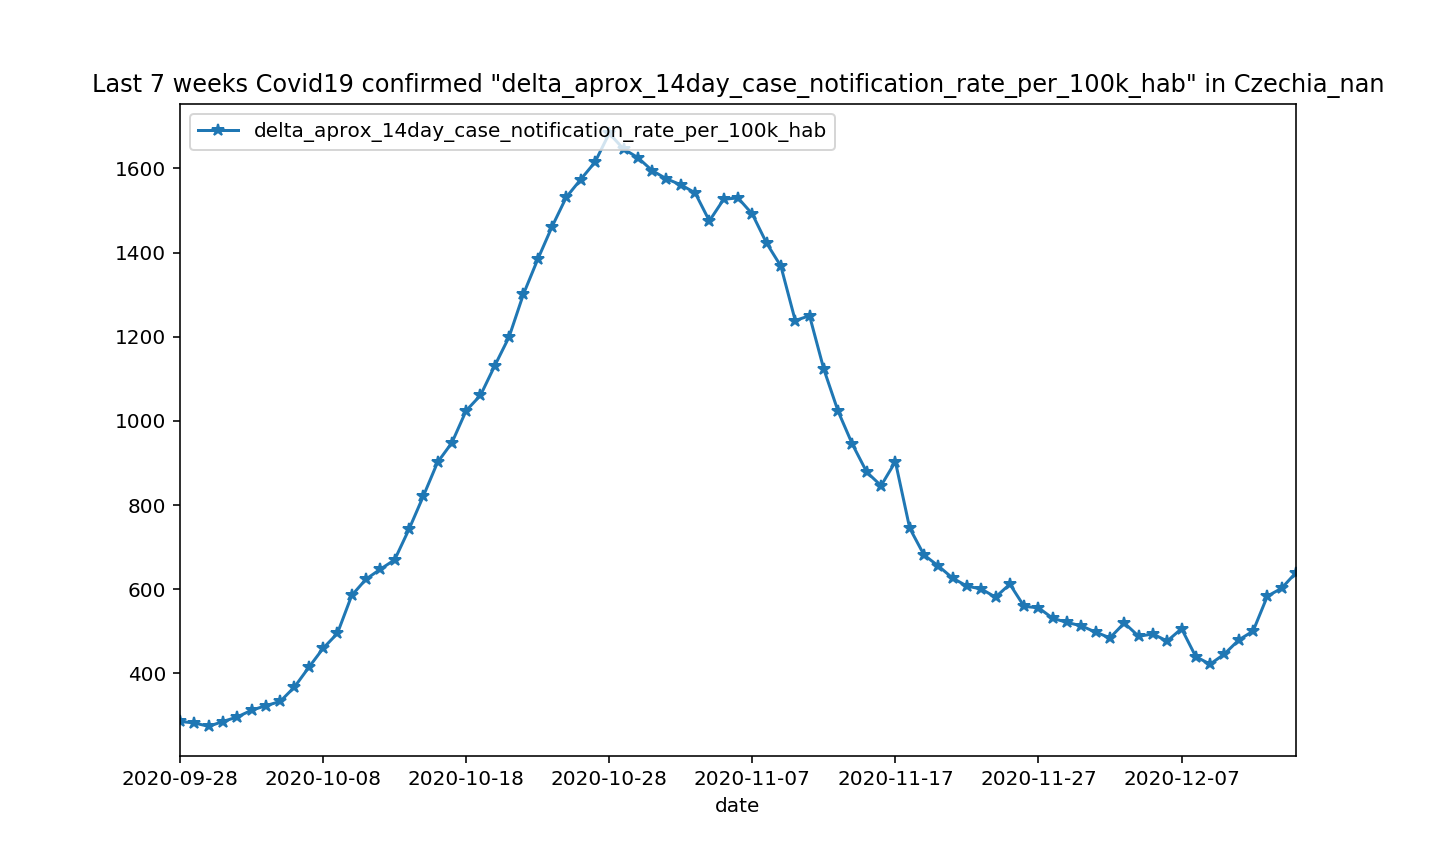

In [38]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


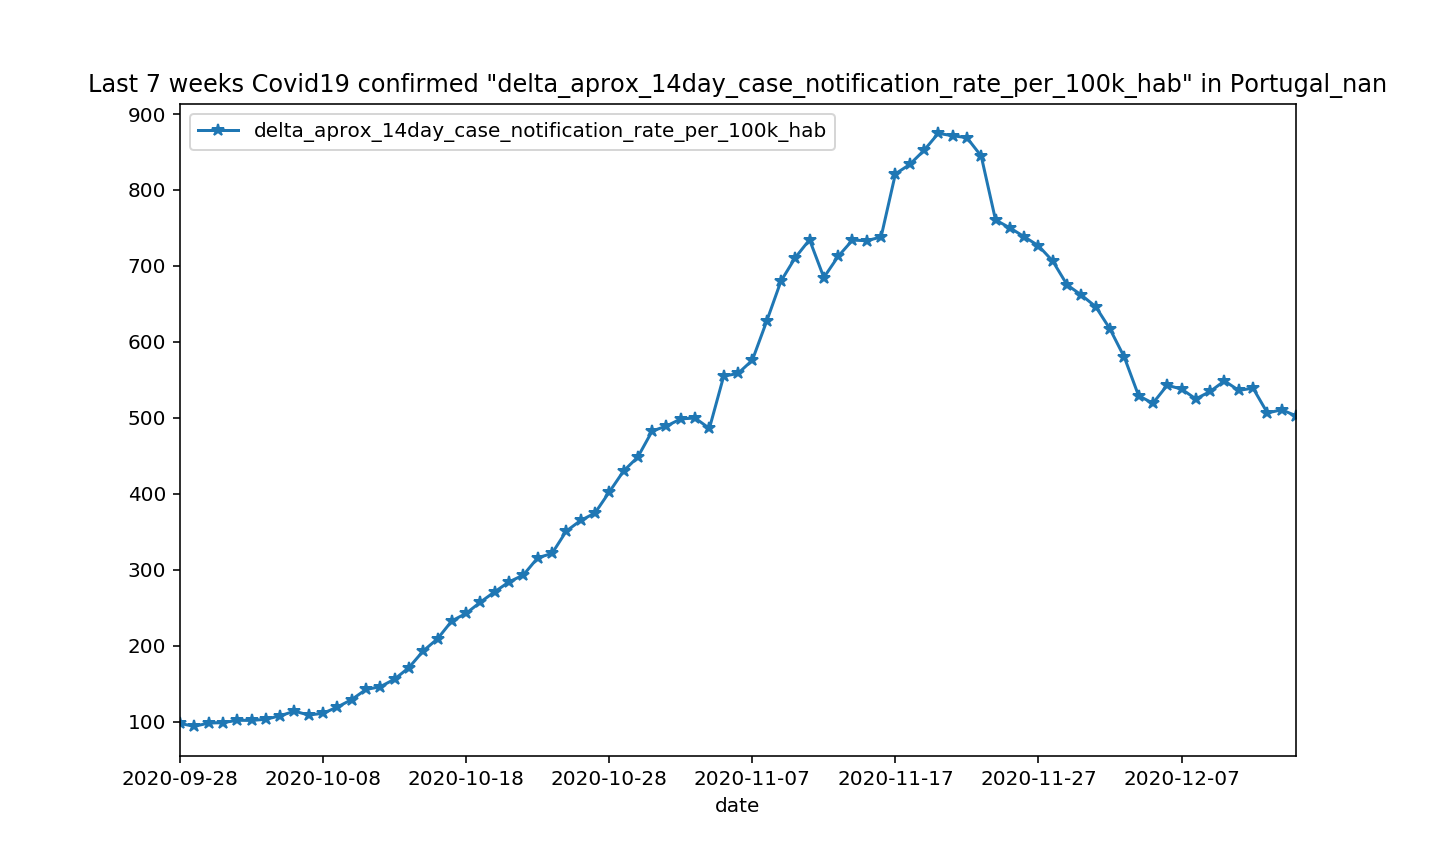

In [39]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [40]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


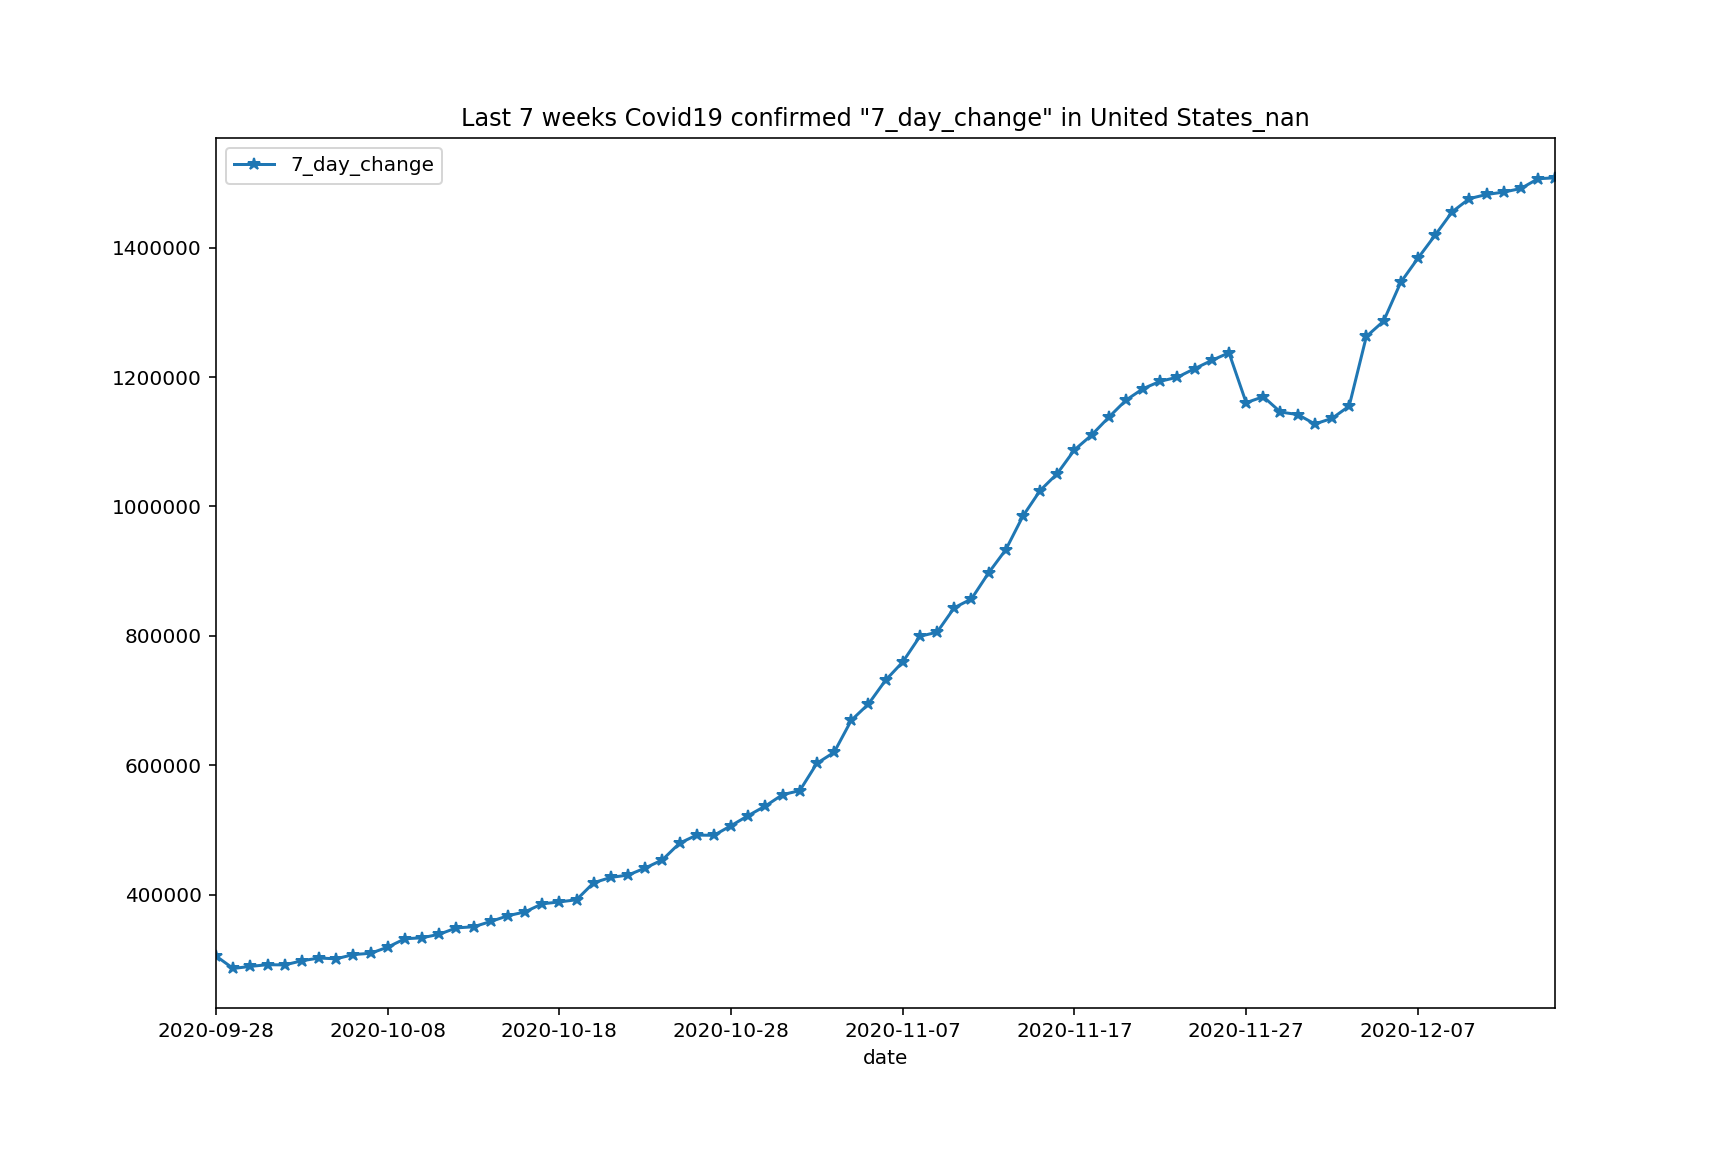

In [41]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


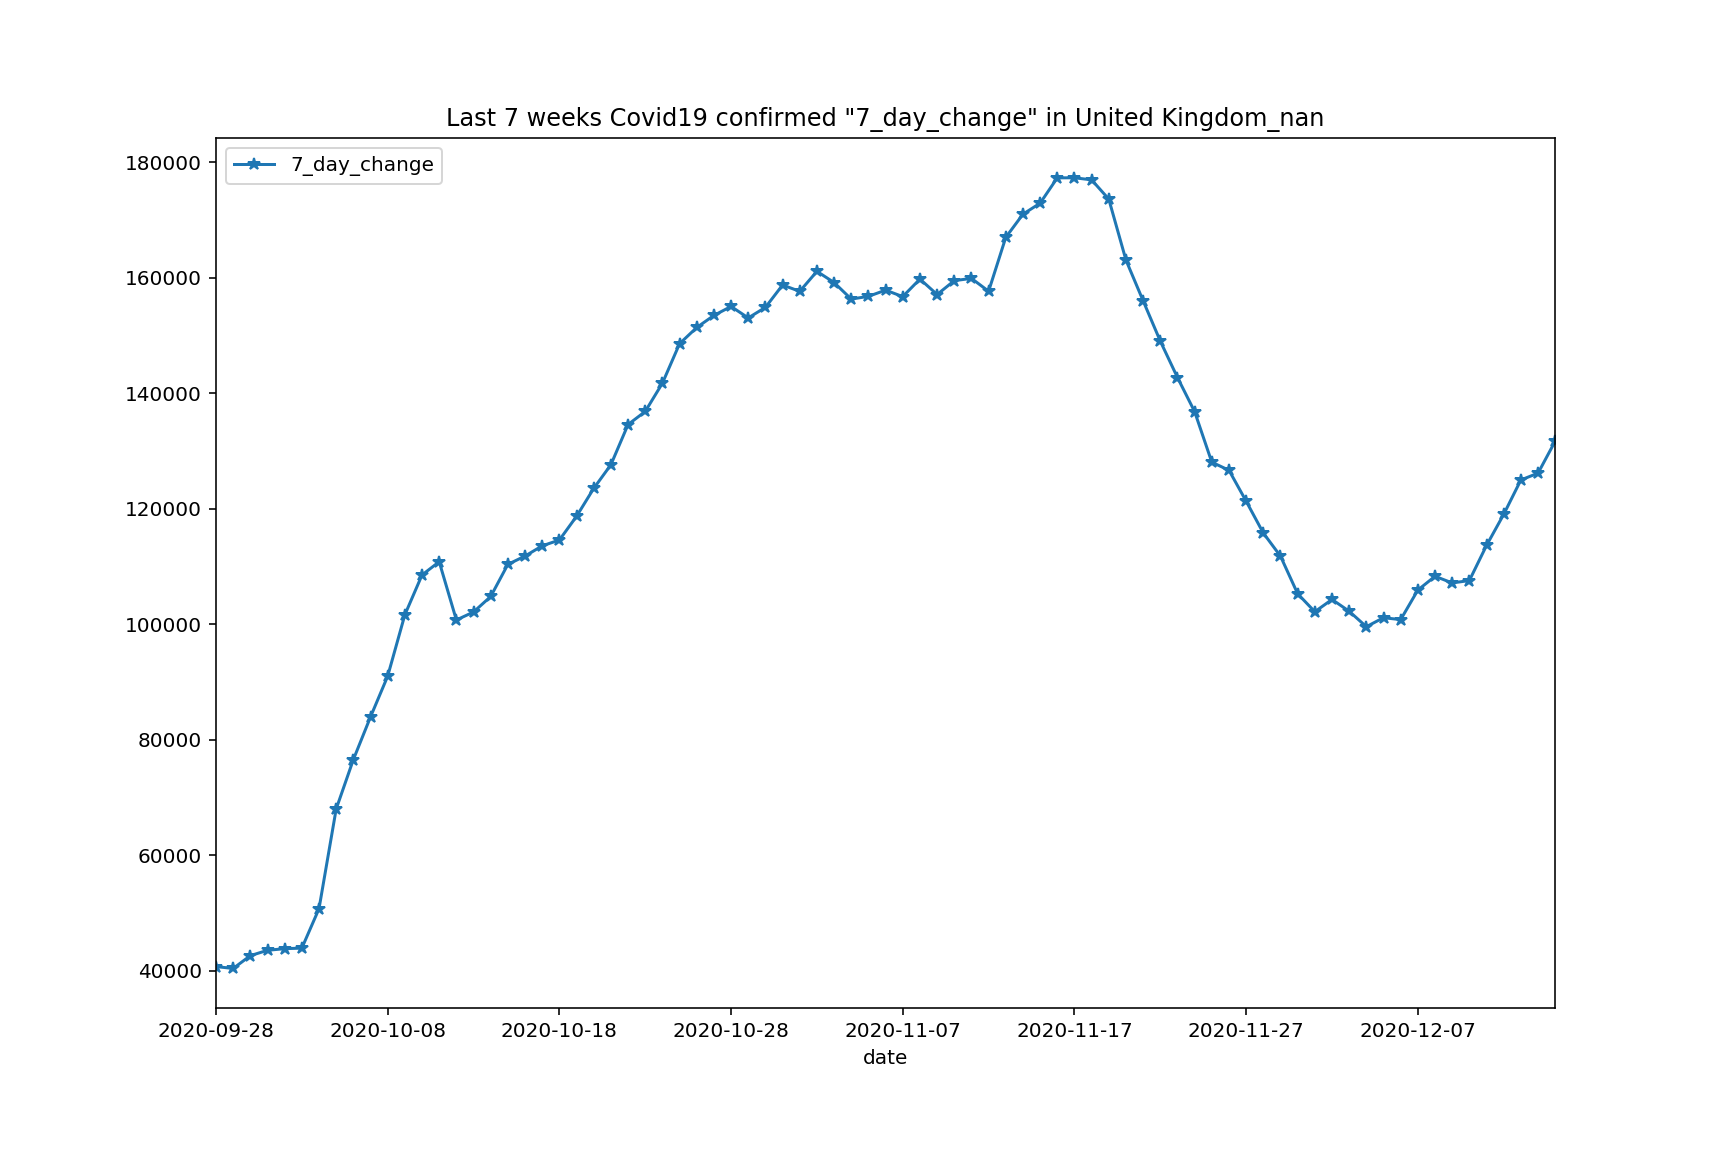

In [42]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


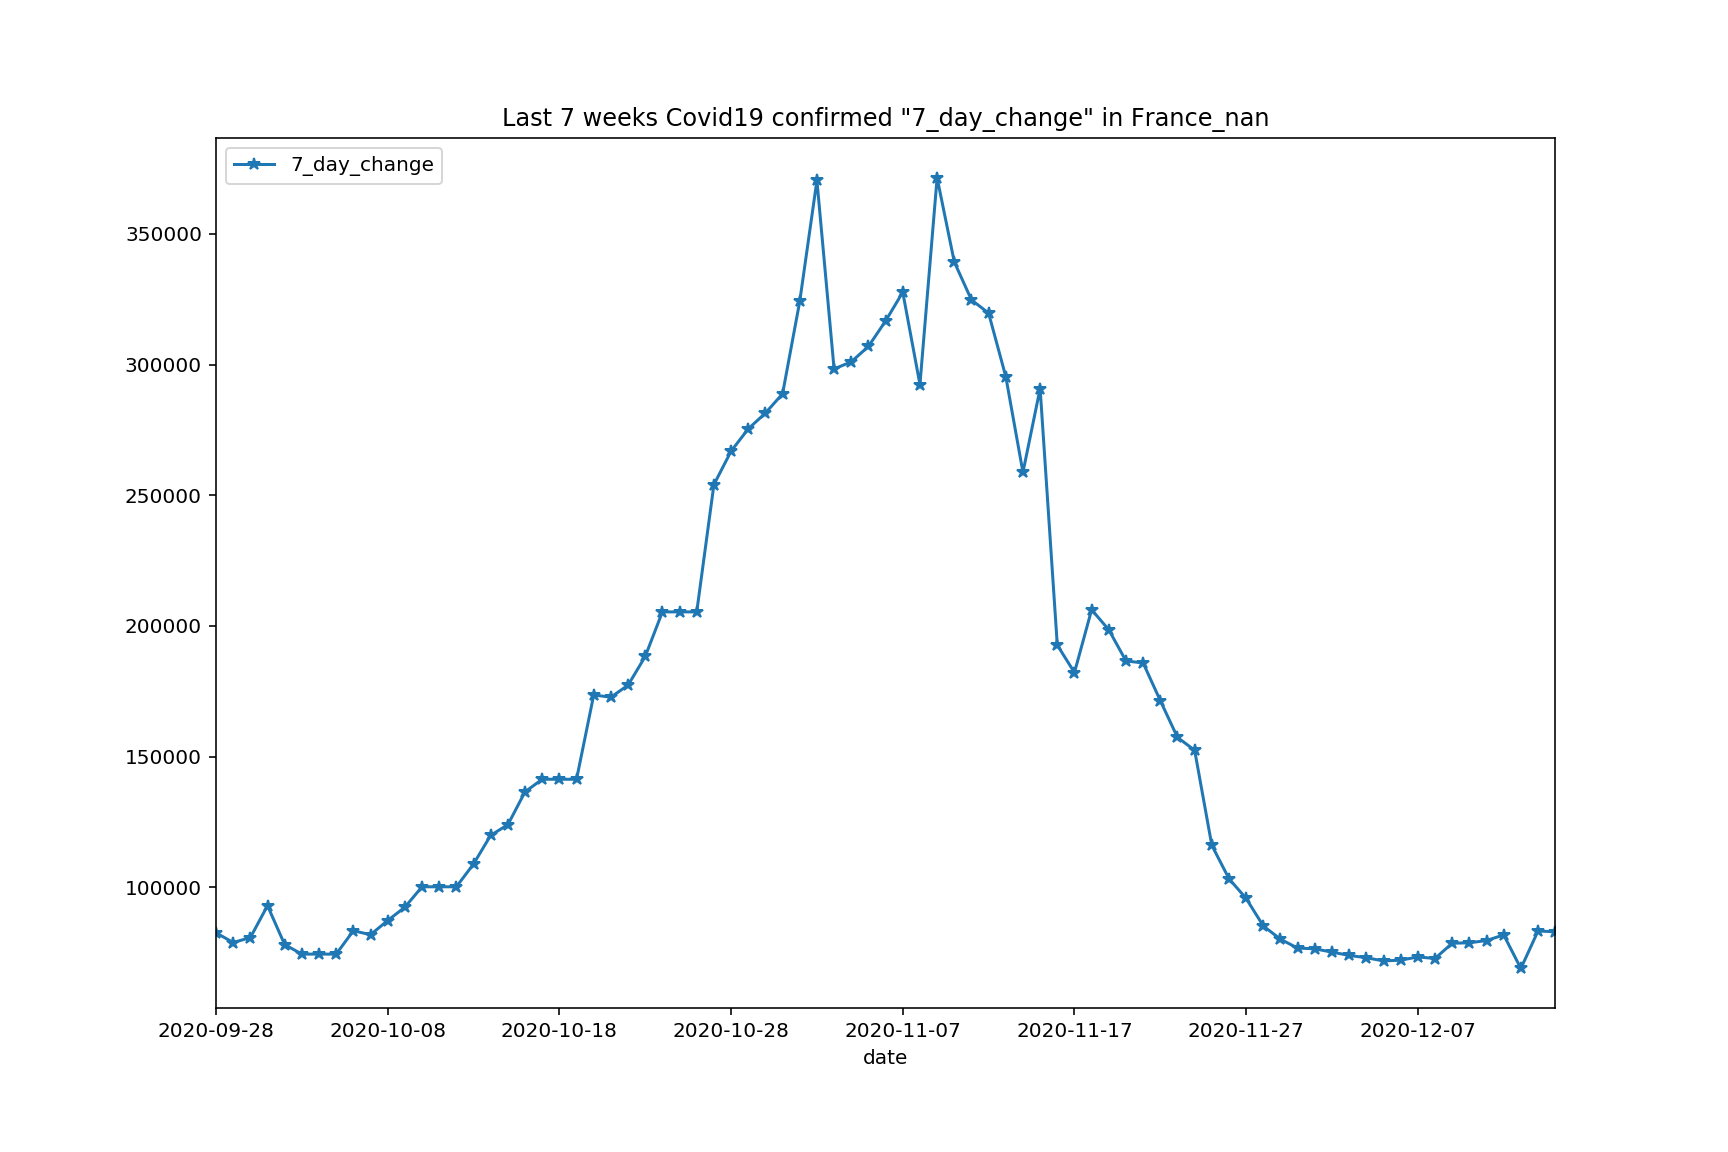

In [43]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


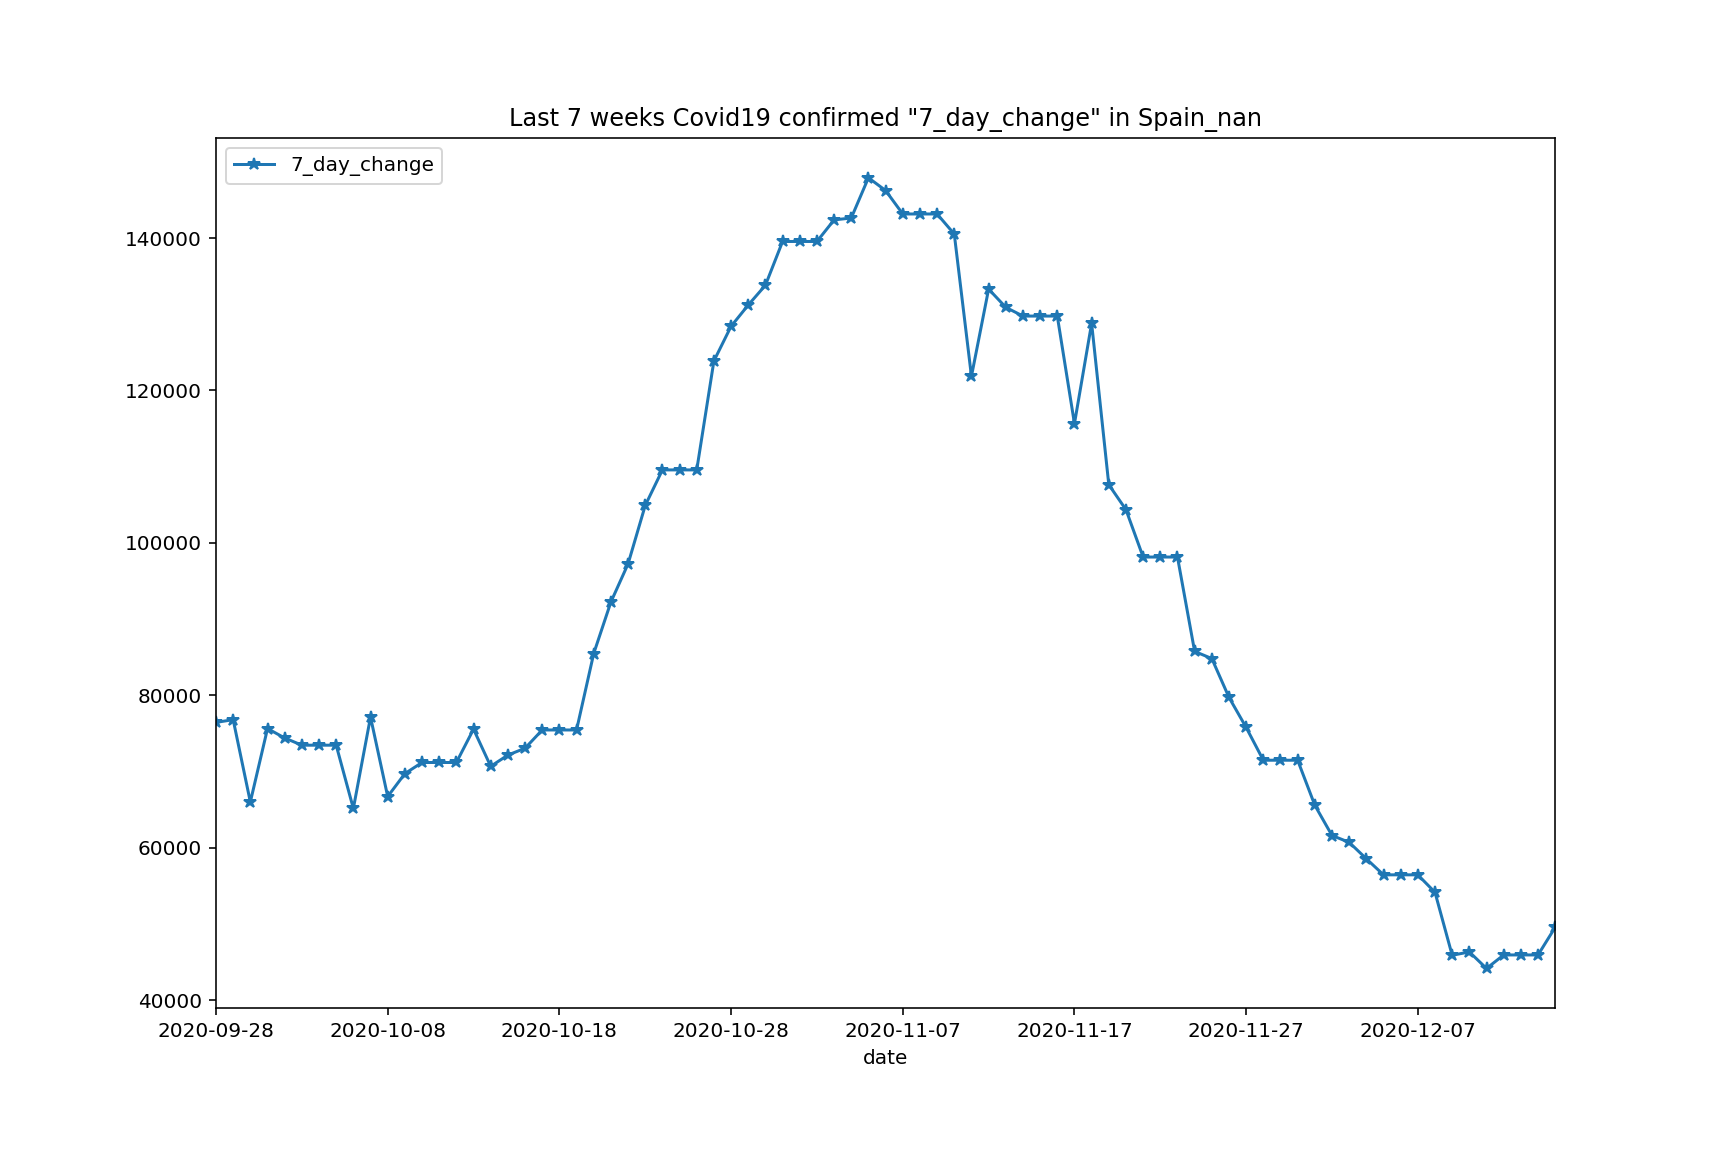

In [44]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


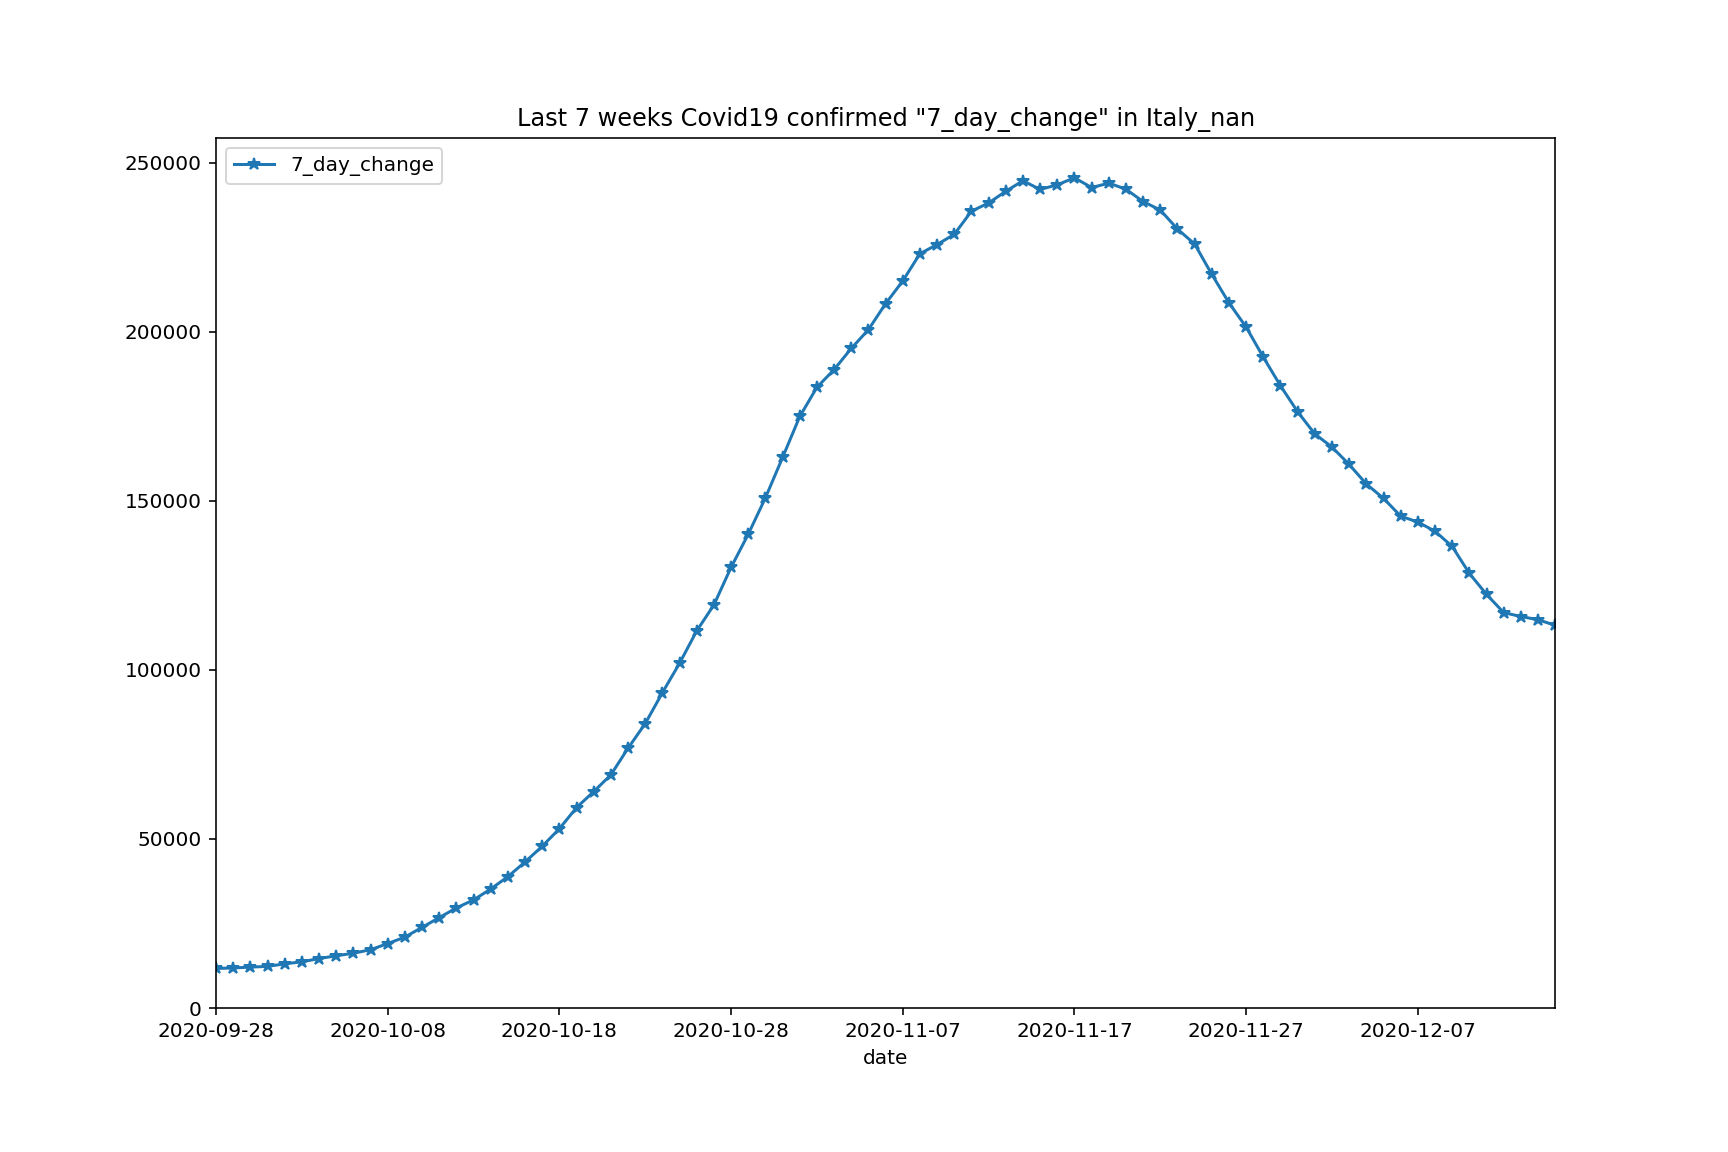

In [45]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


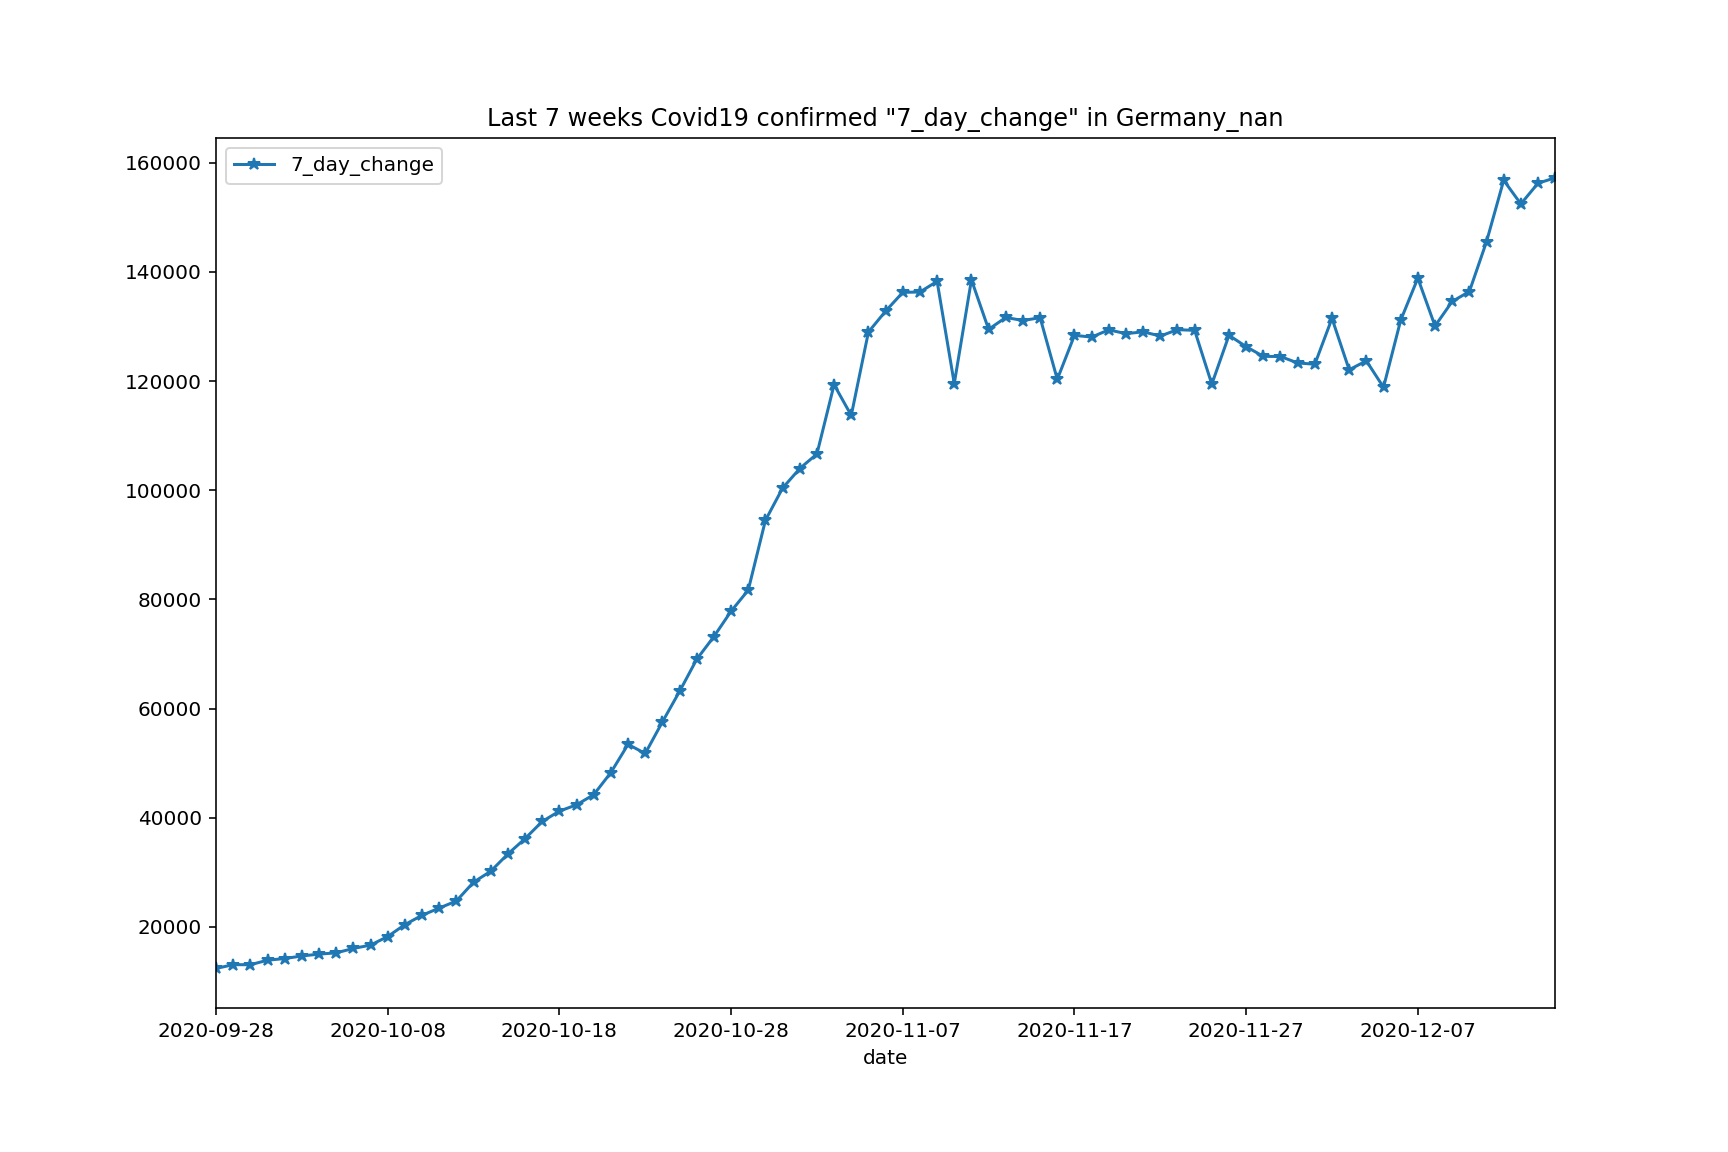

In [46]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


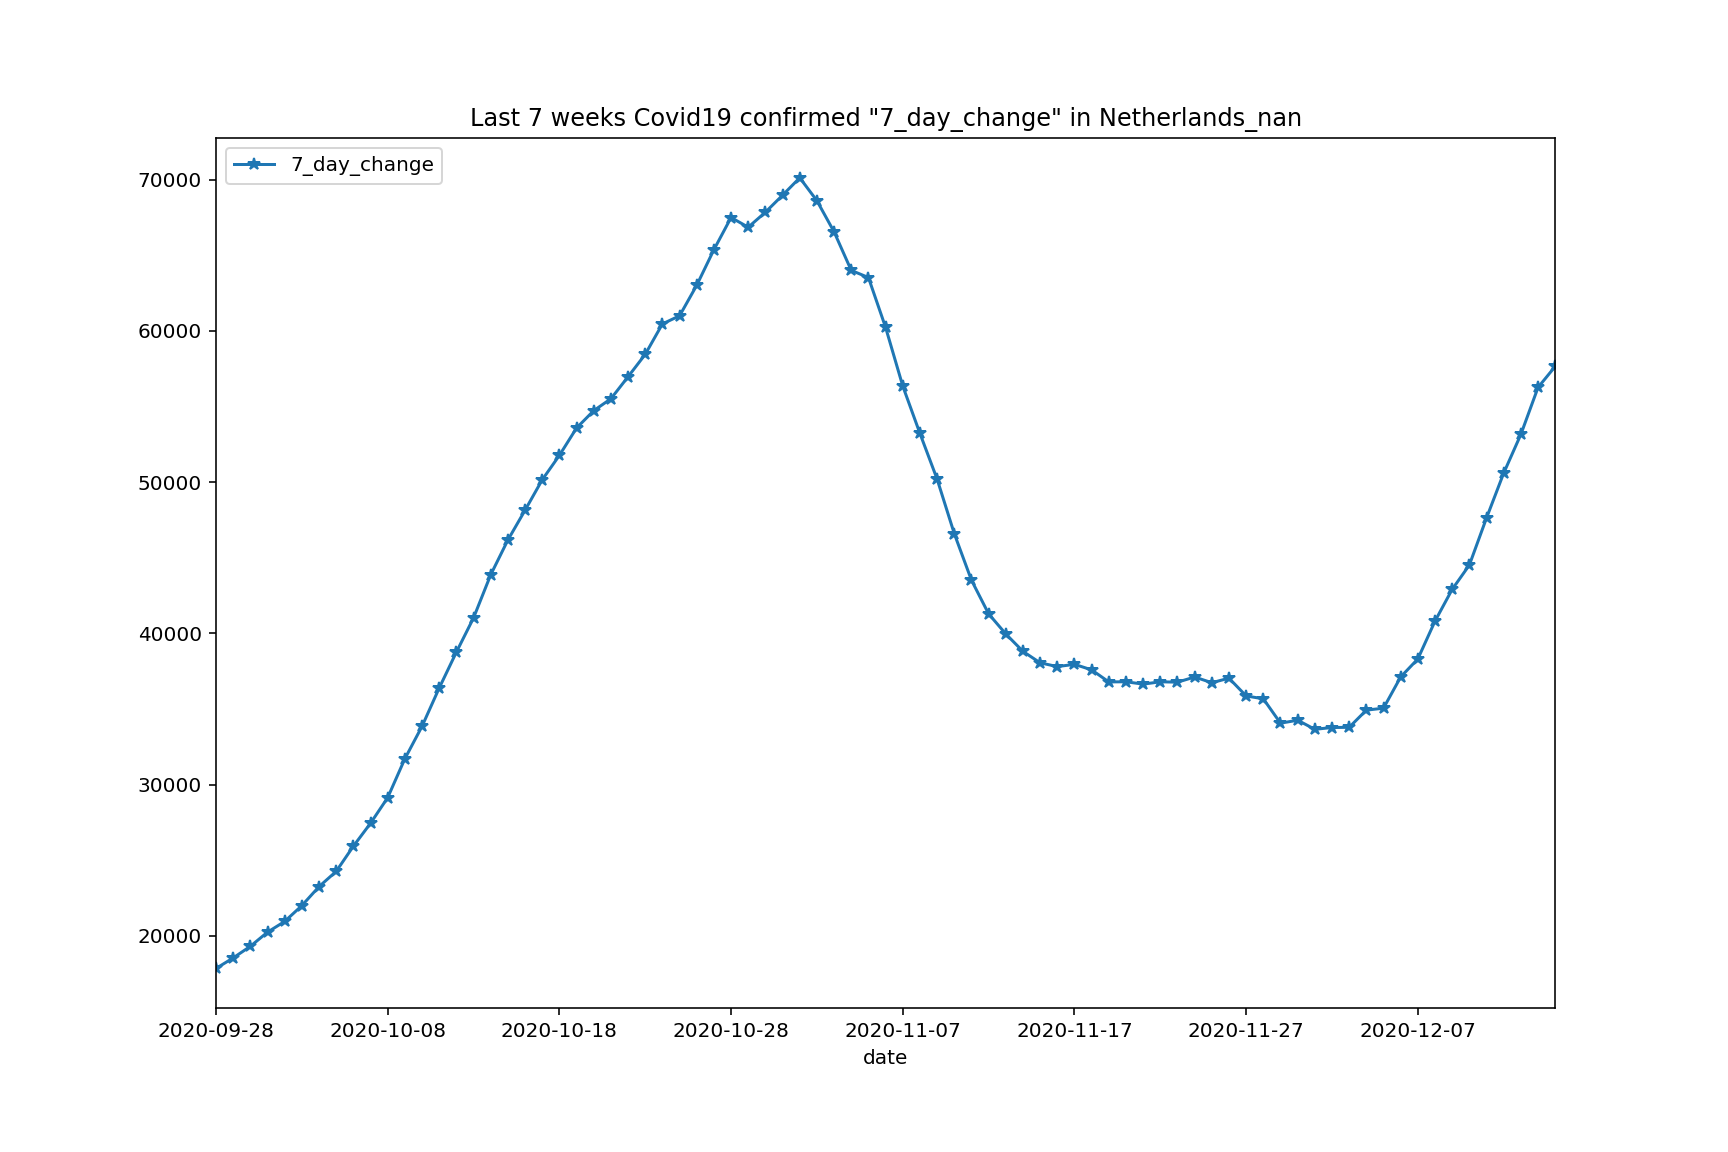

In [47]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


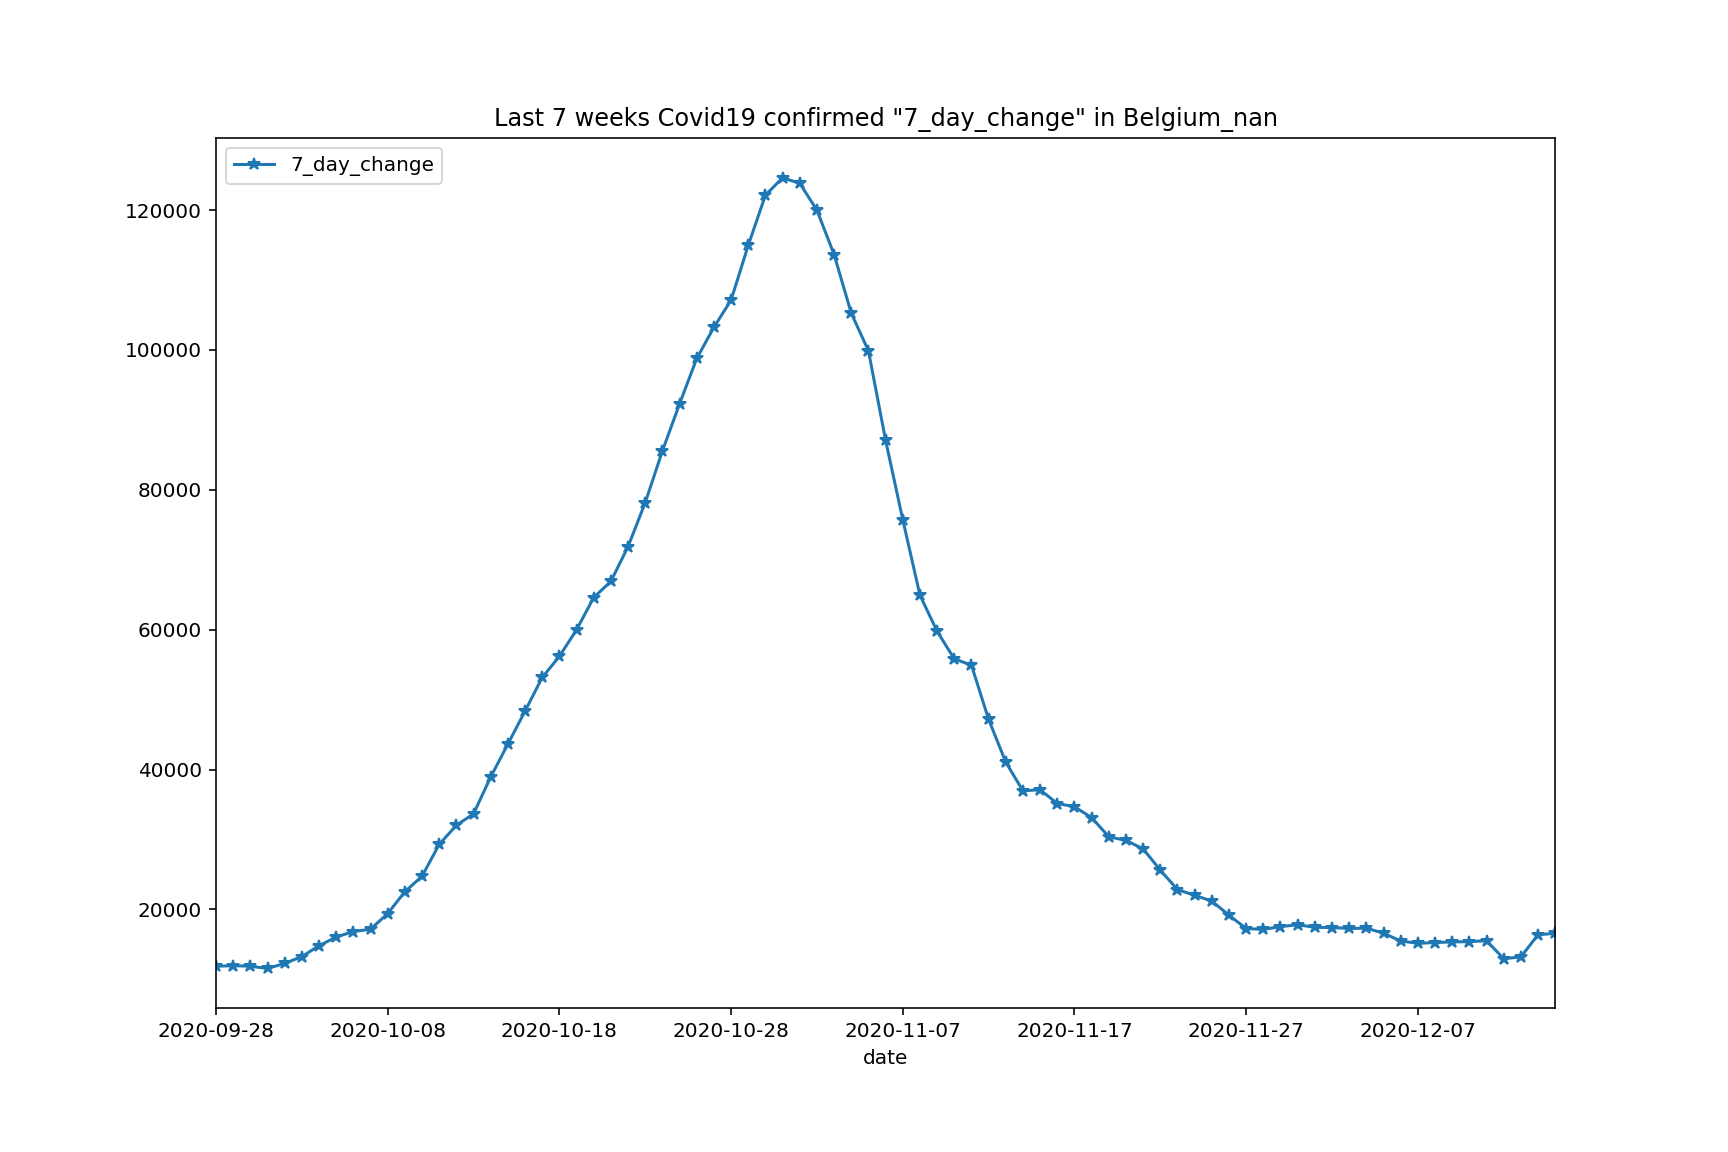

In [48]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


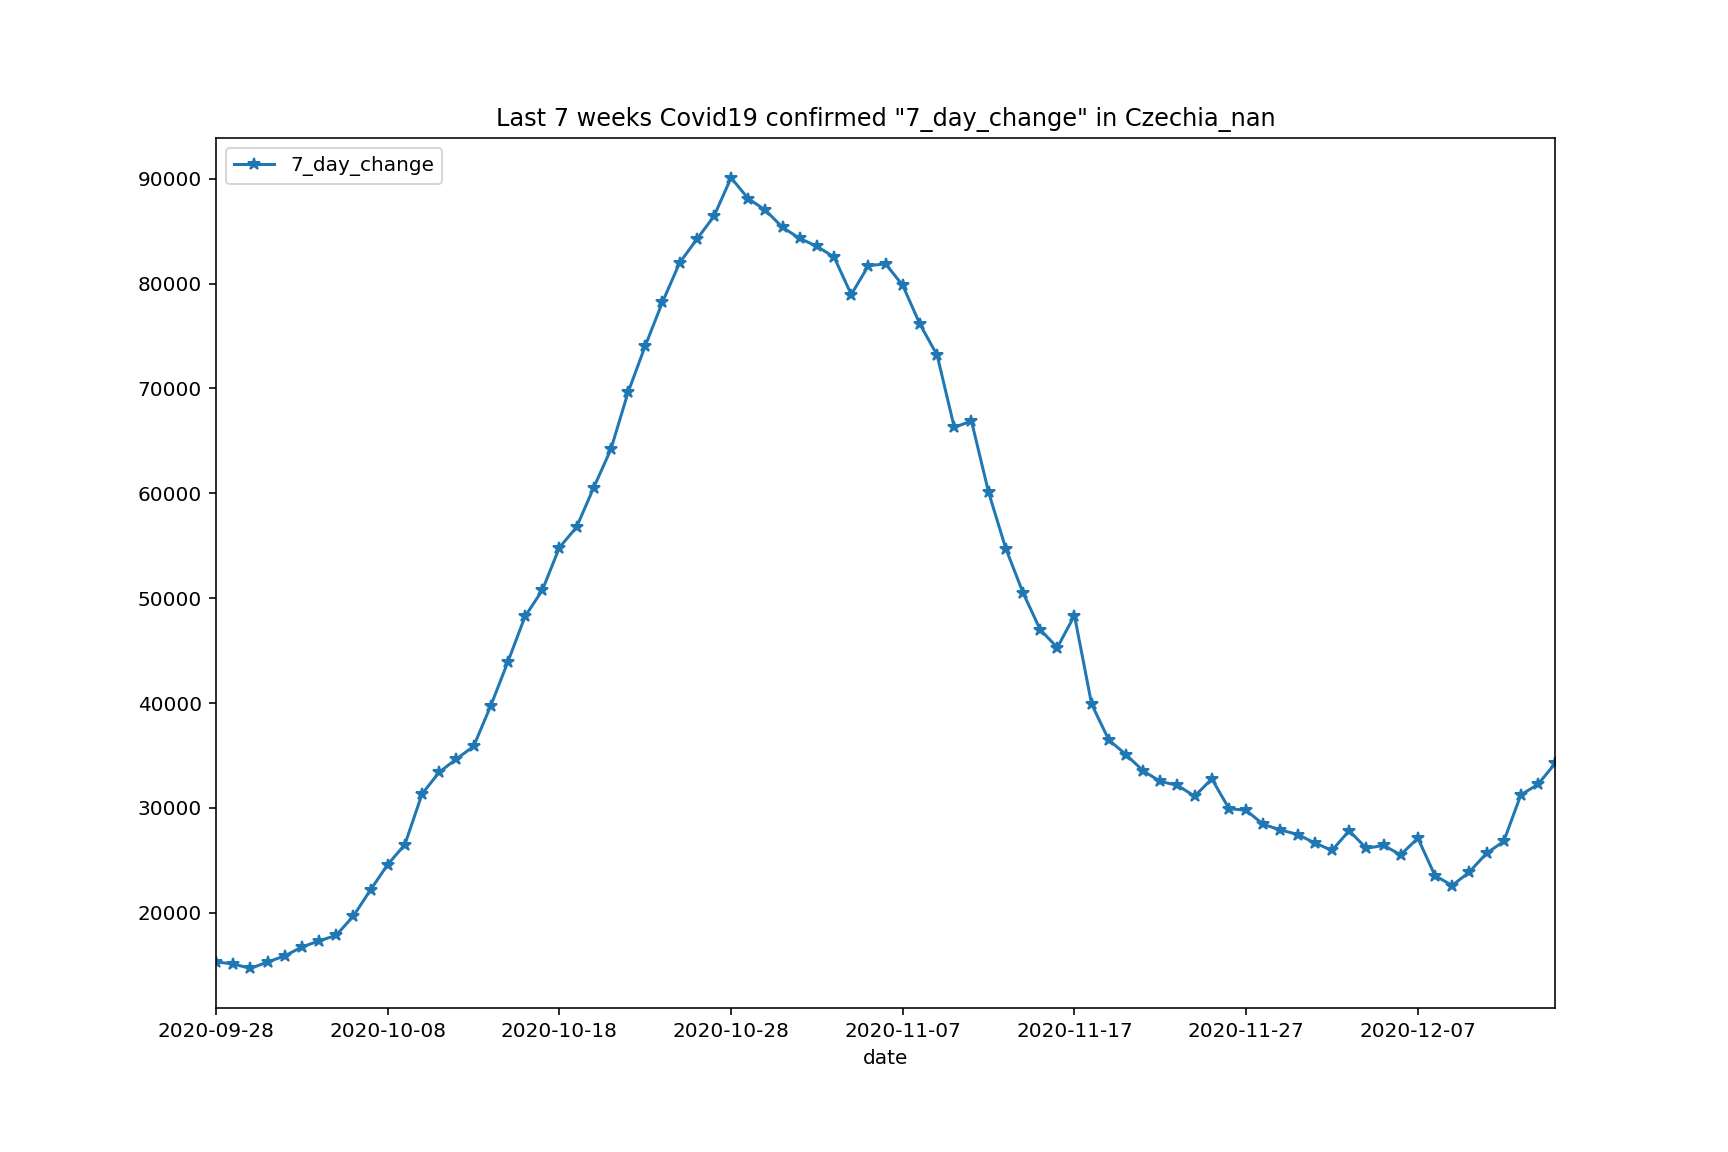

In [49]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


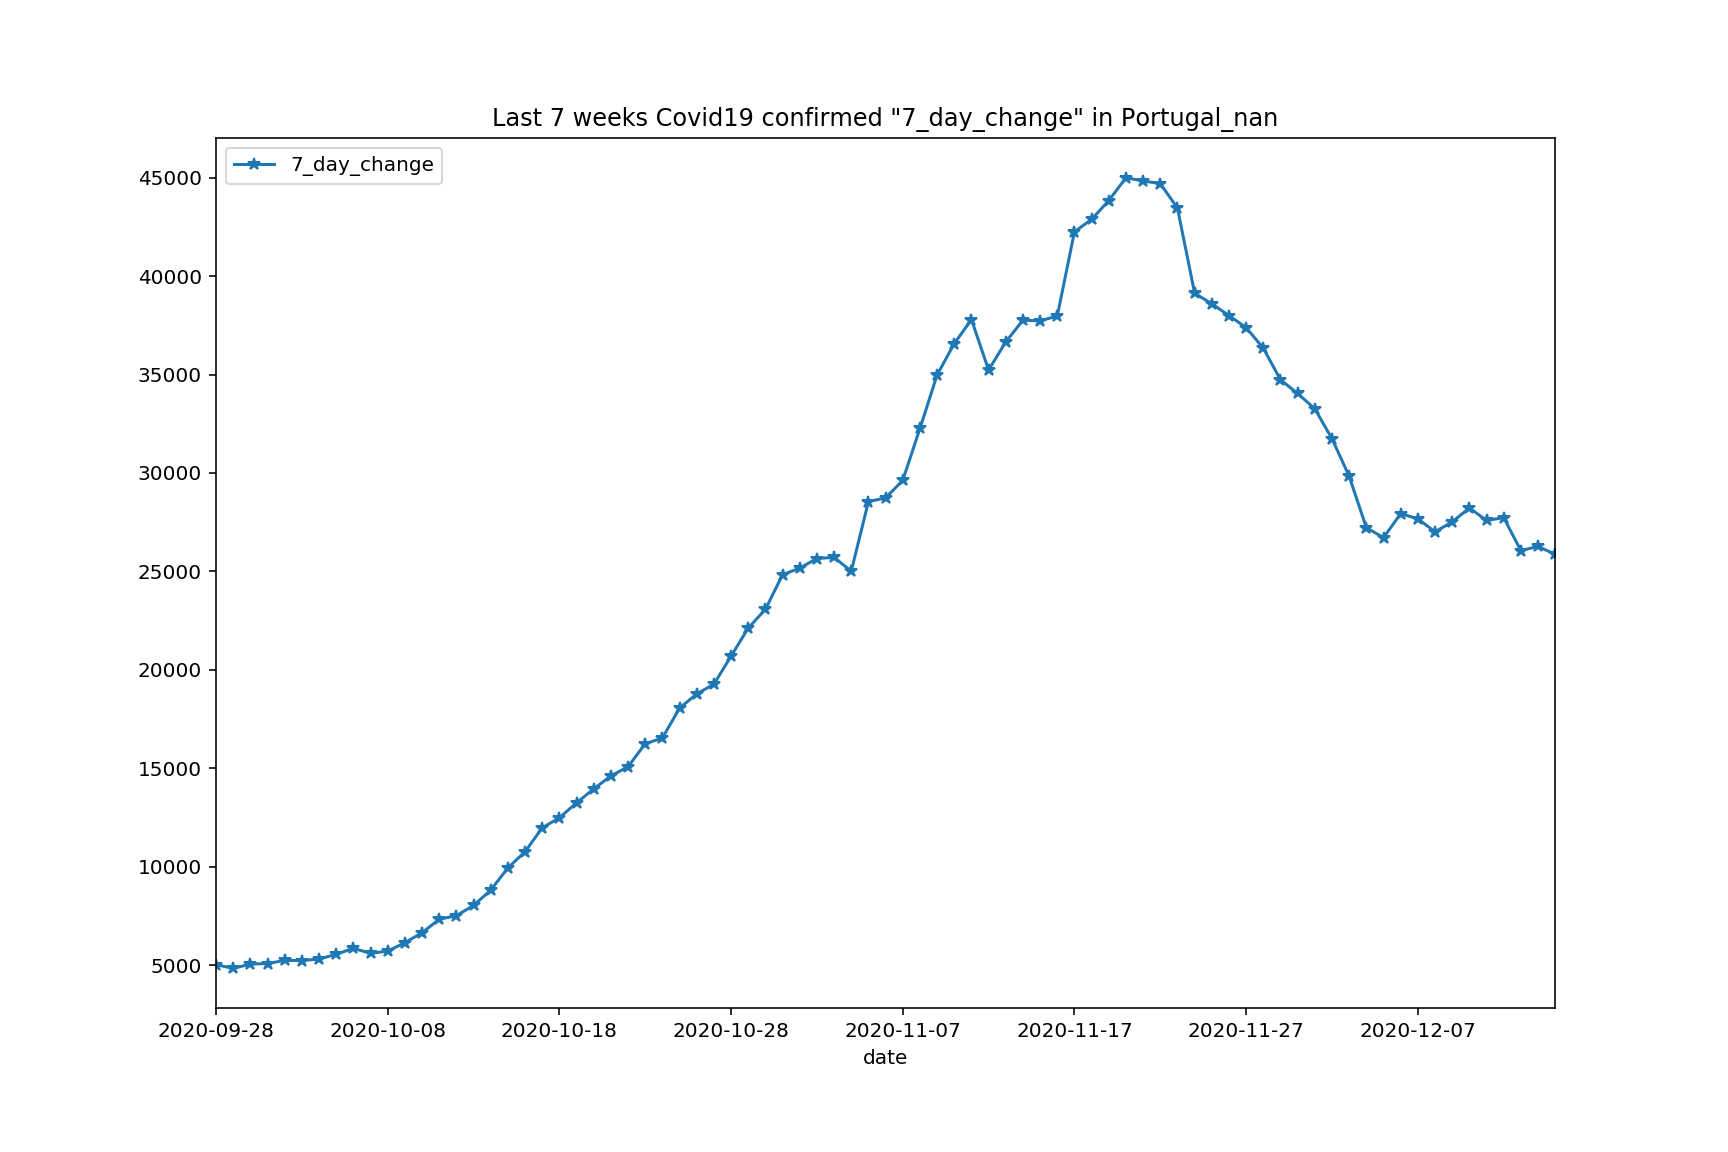

In [50]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [51]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


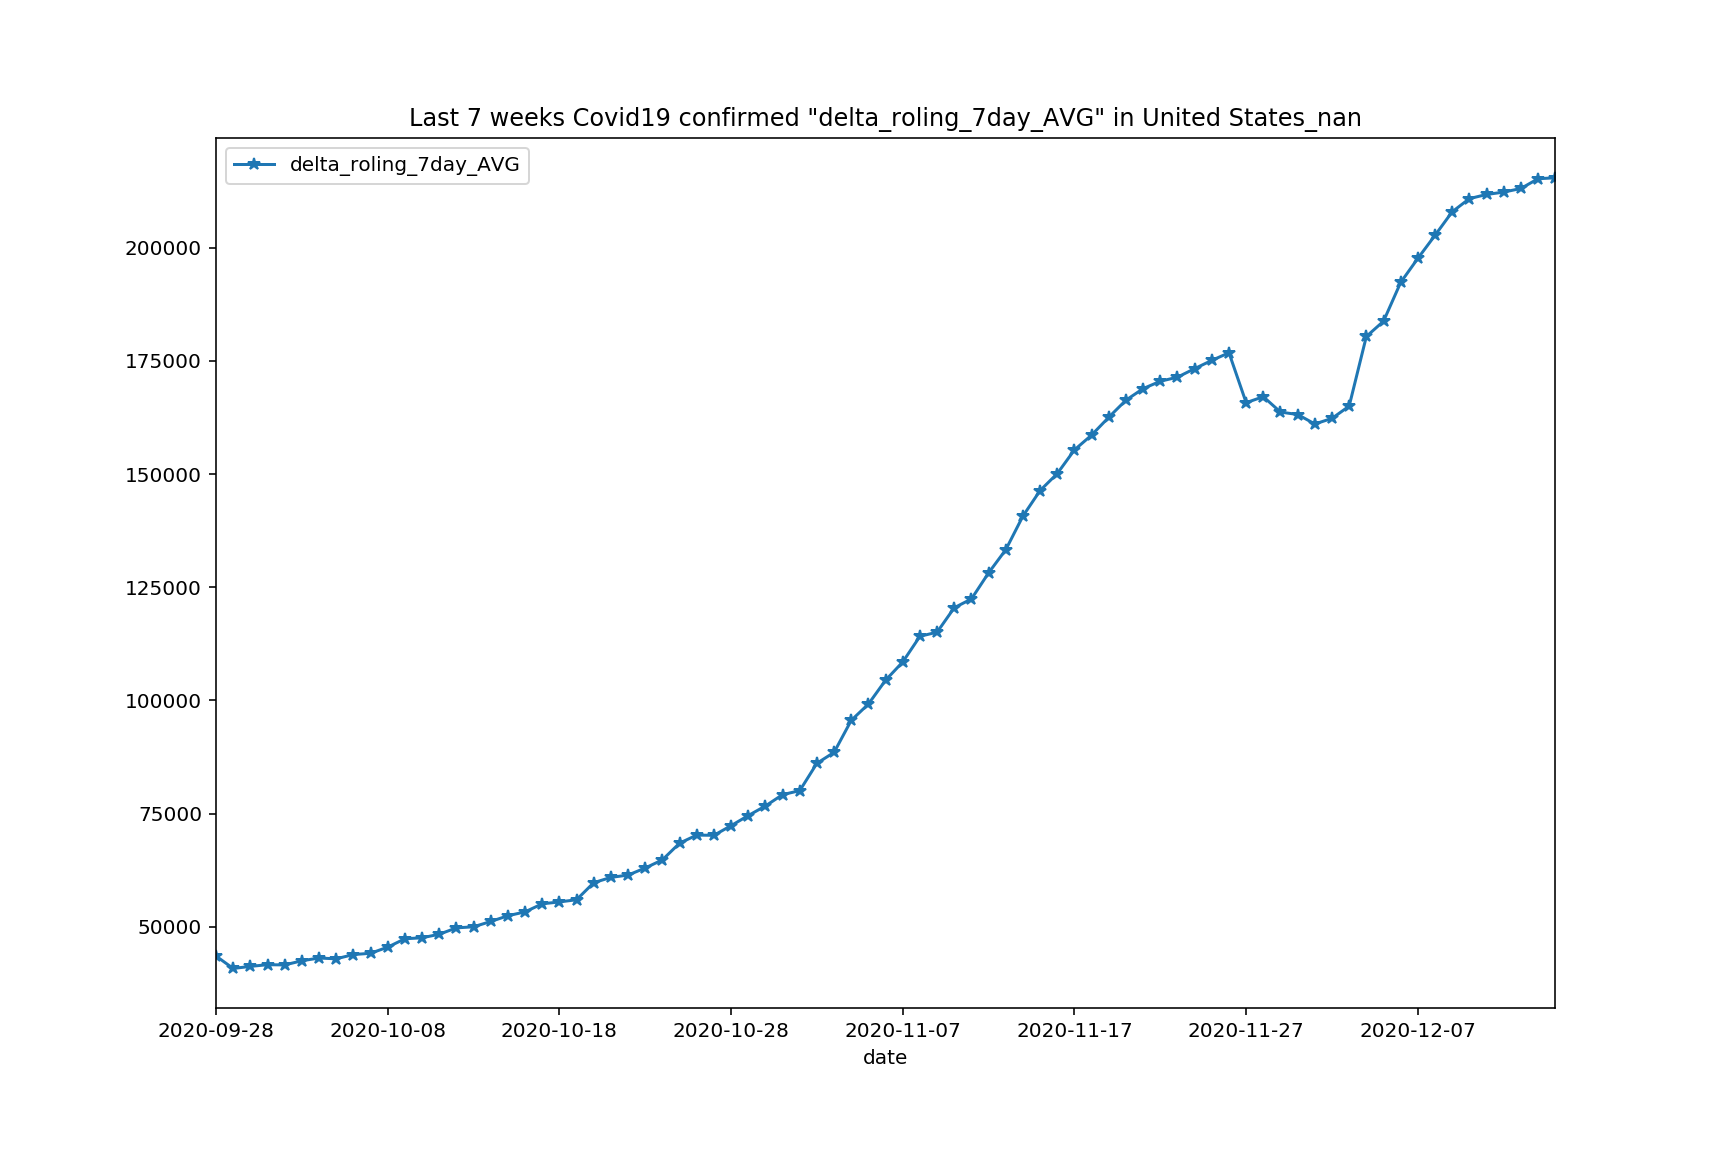

In [52]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


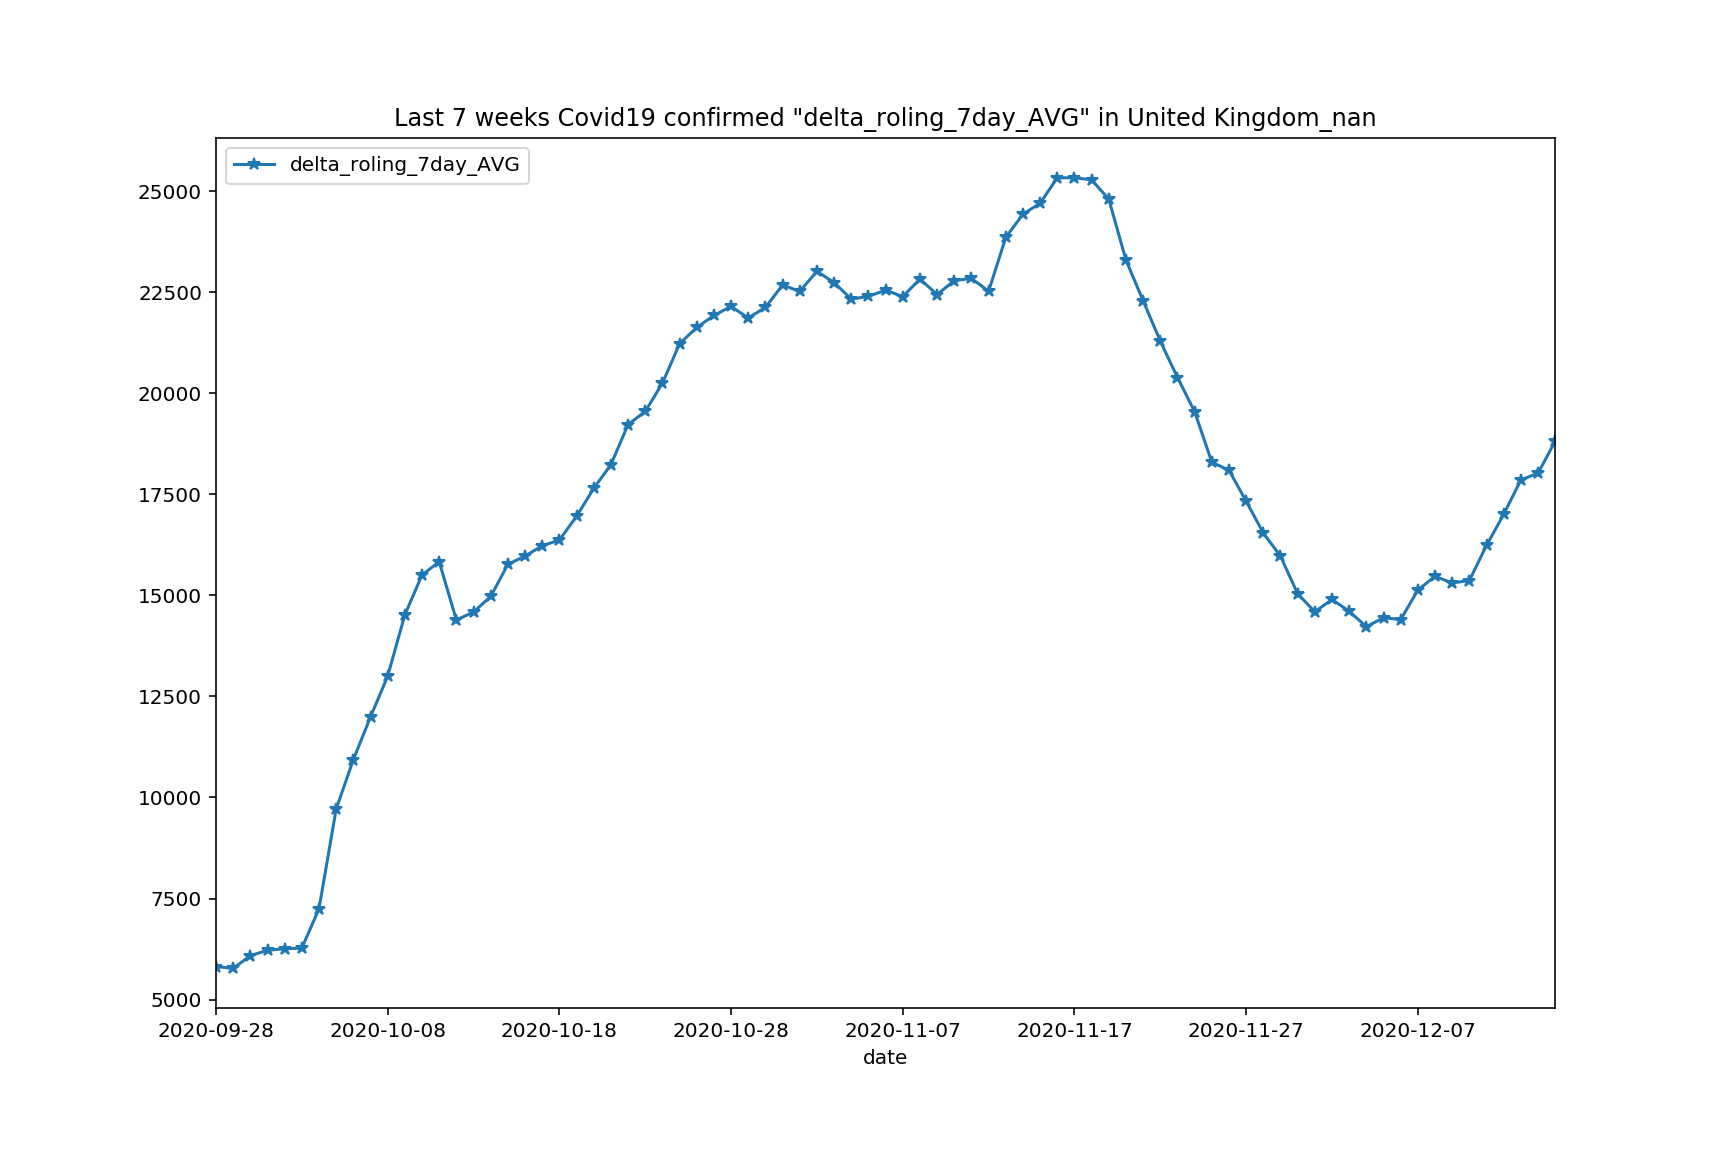

In [53]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


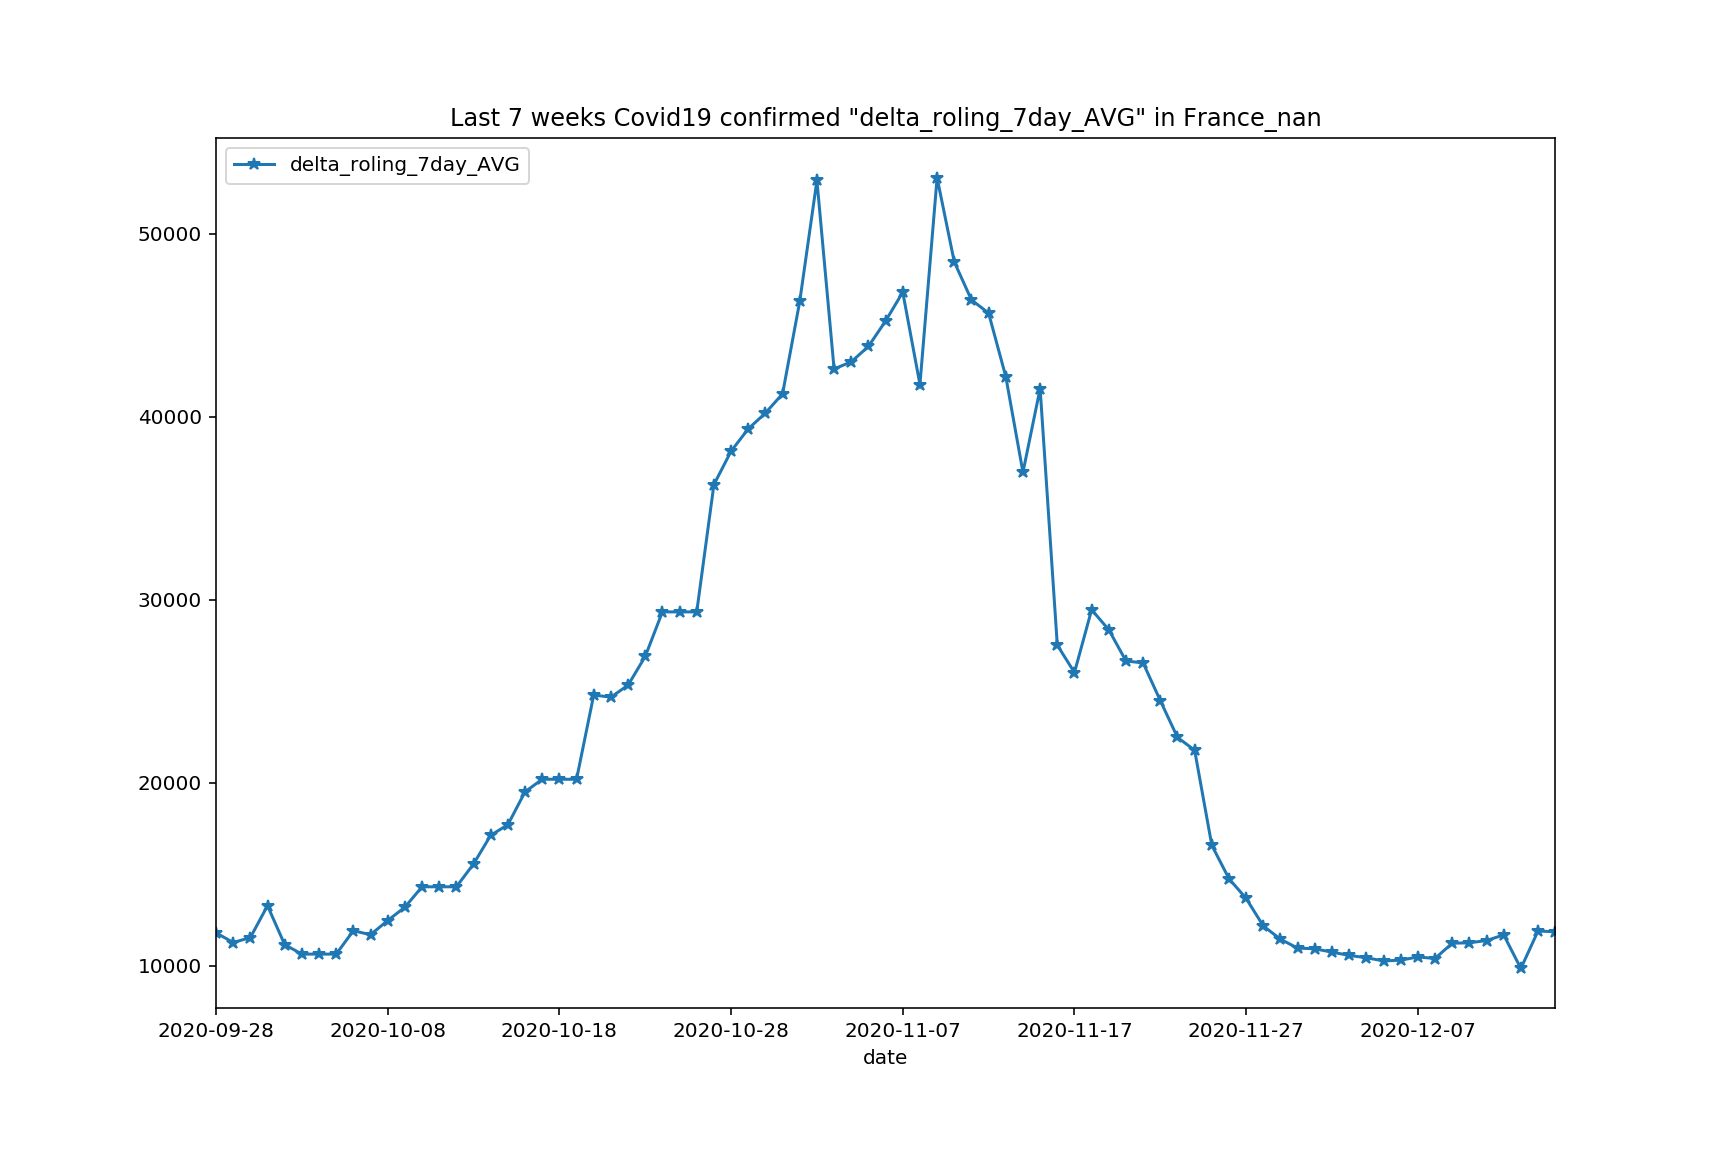

In [54]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


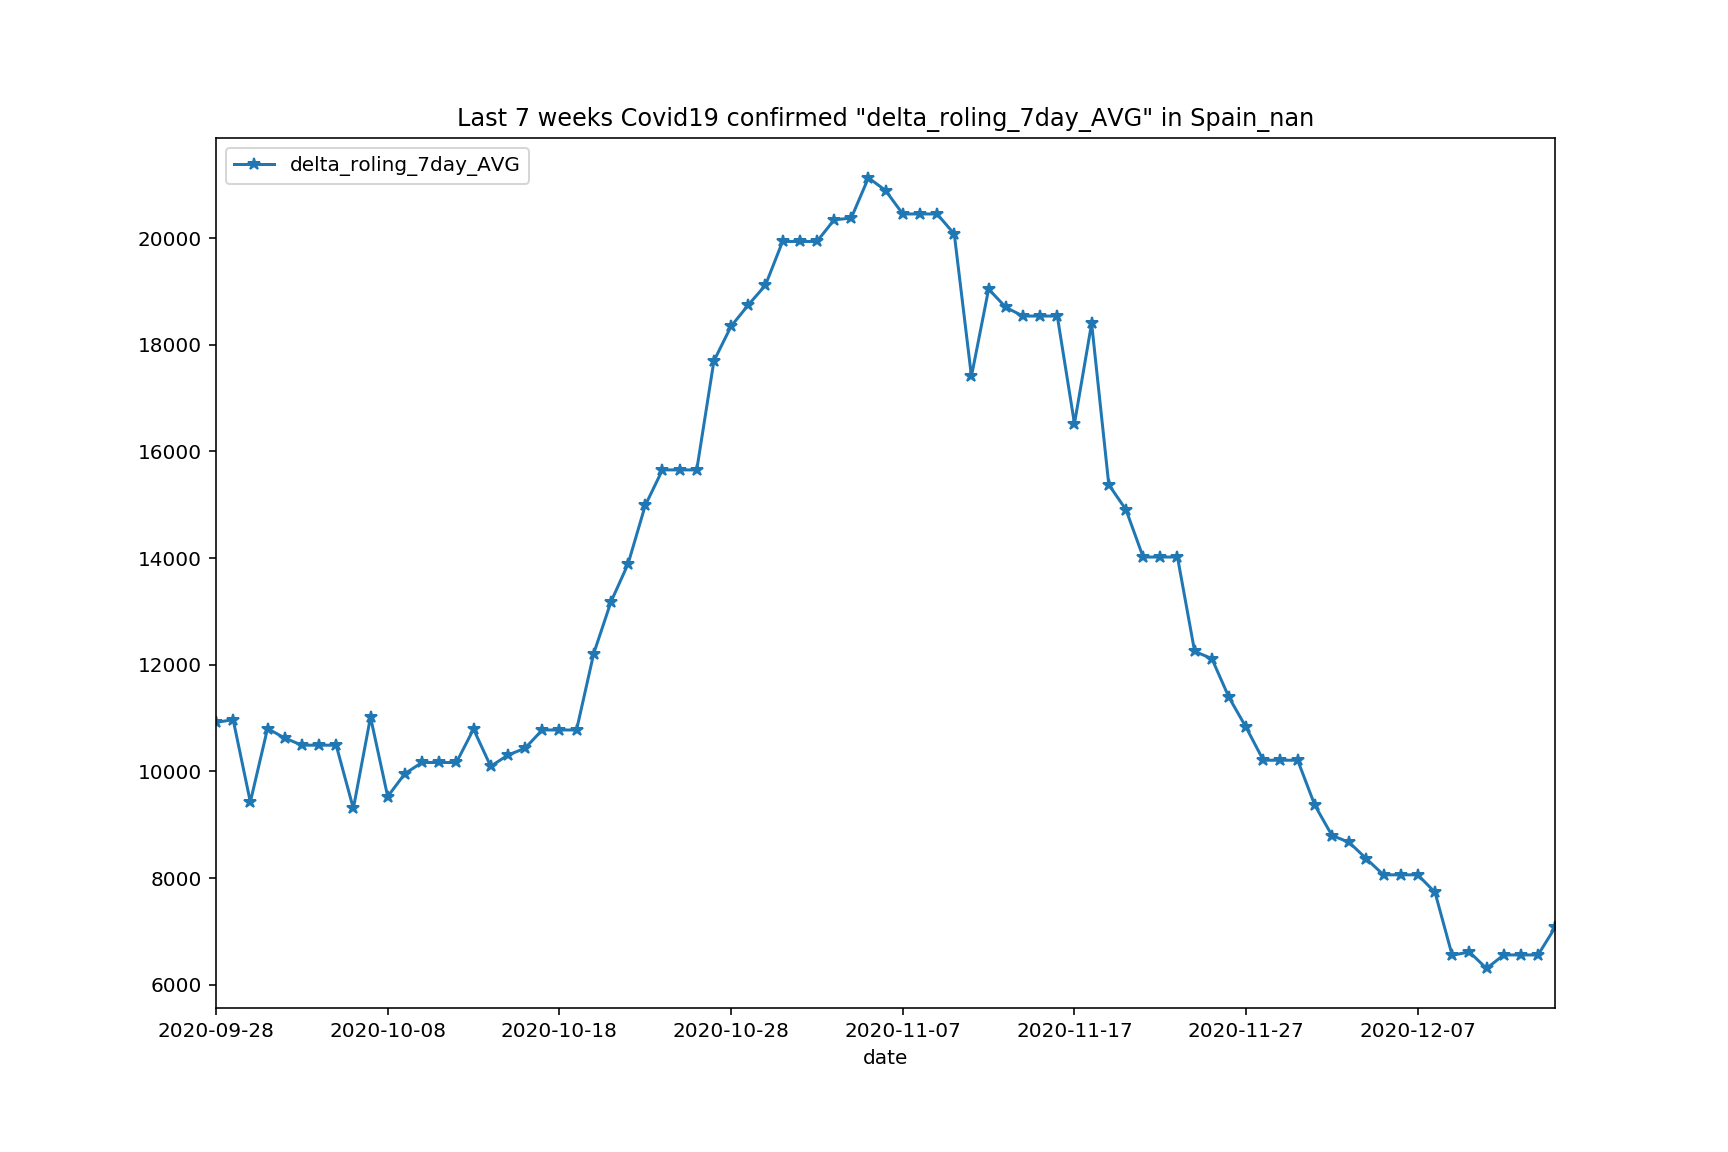

In [55]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


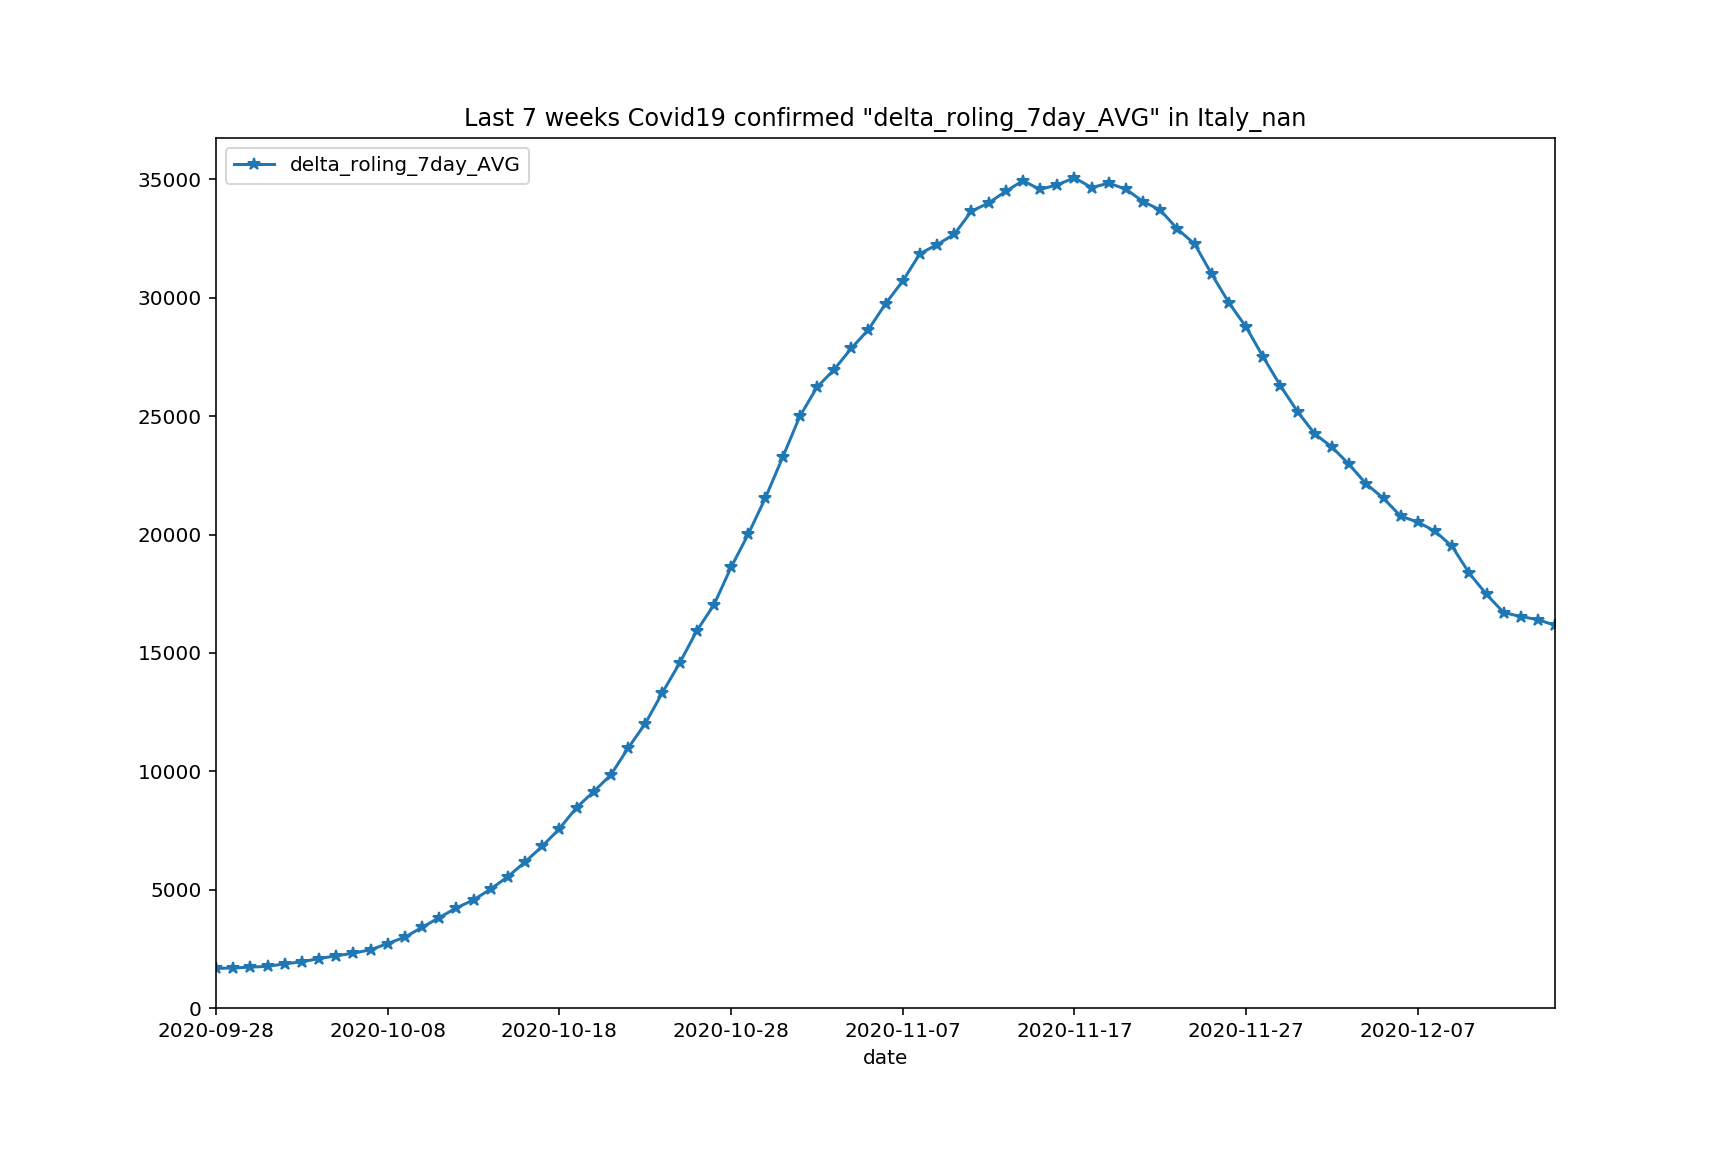

In [56]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


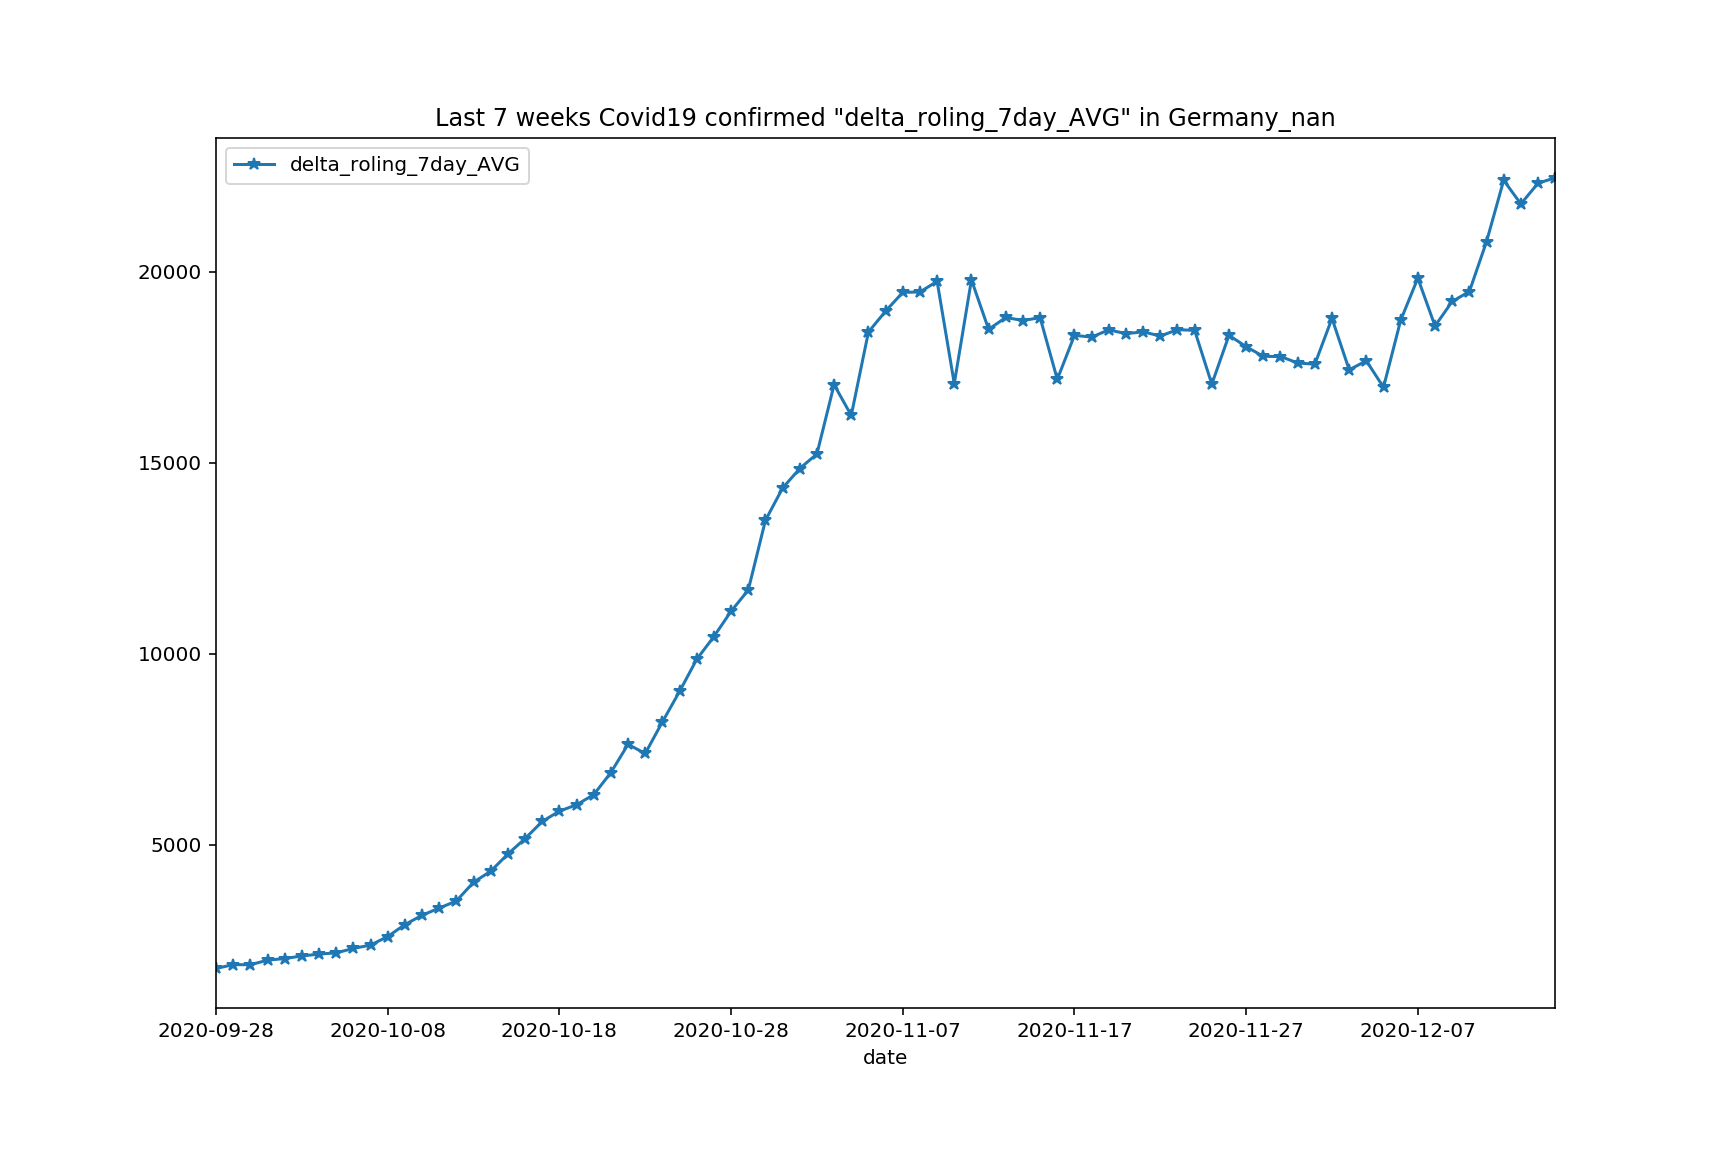

In [57]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


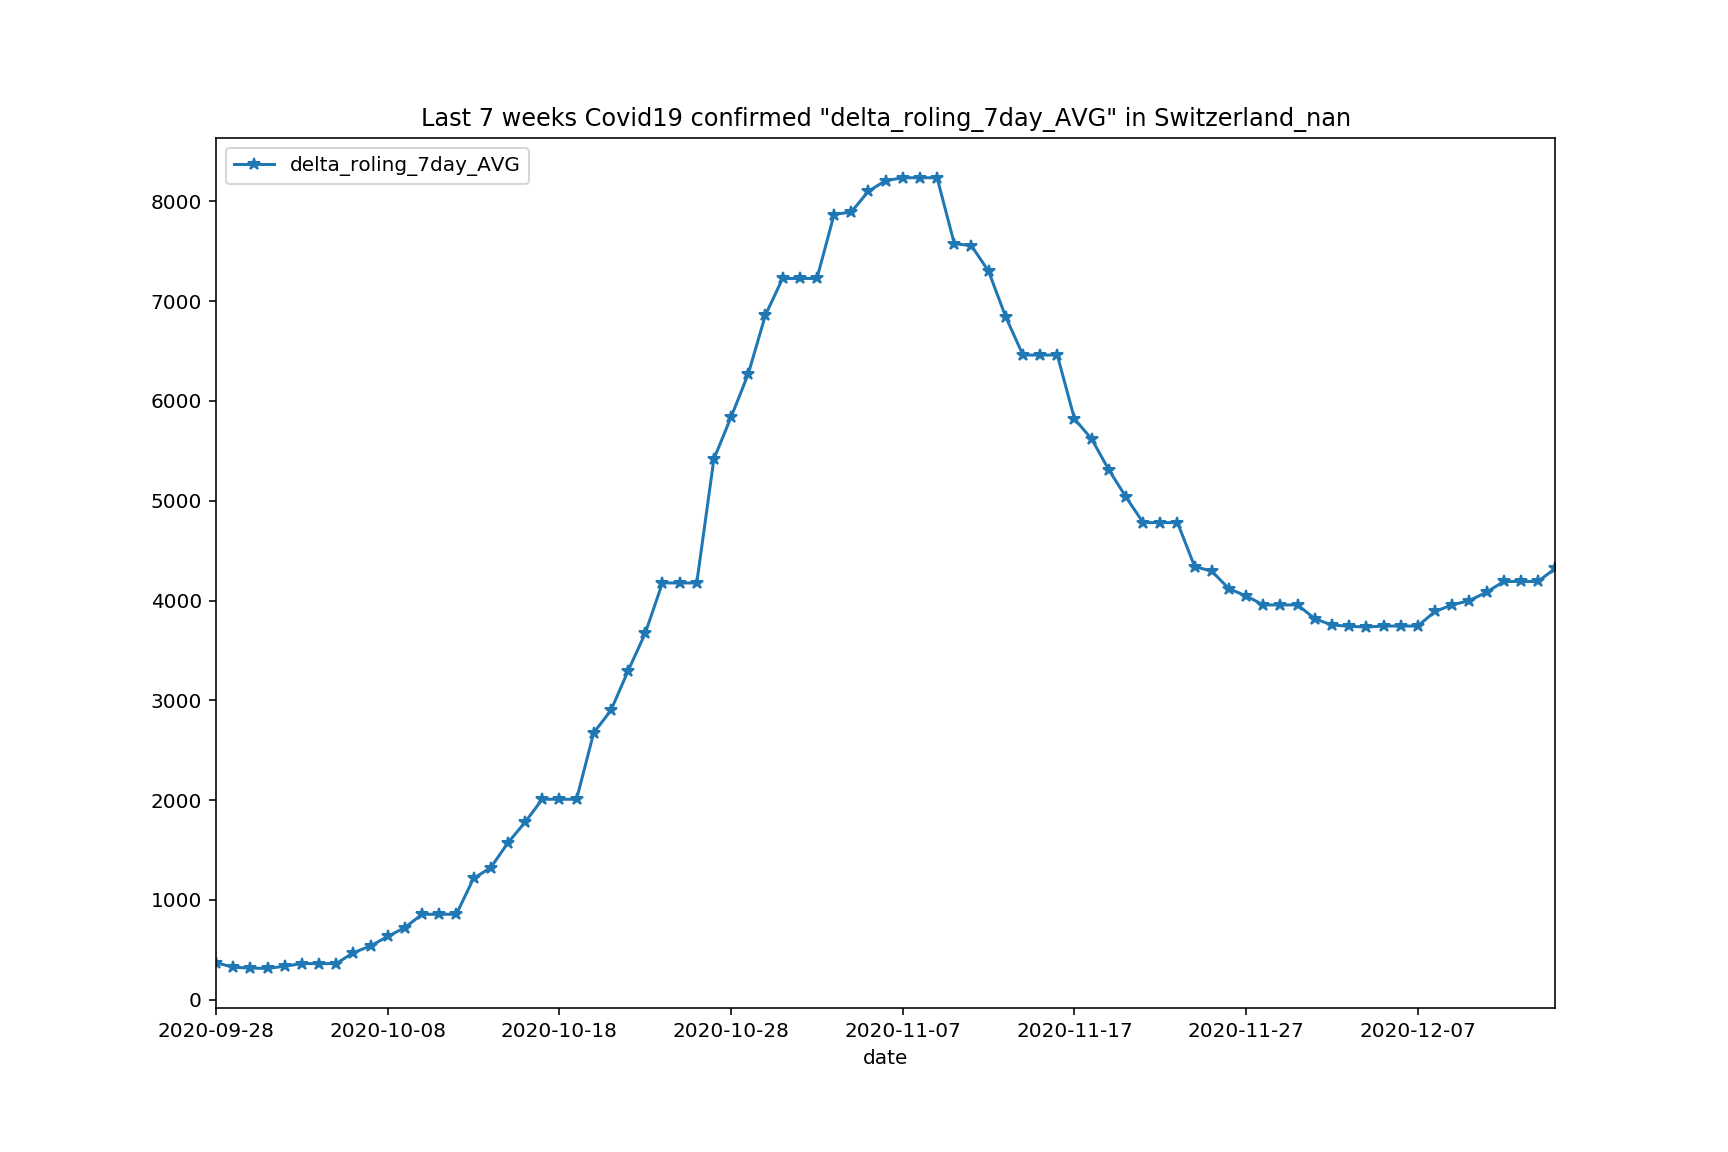

In [58]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


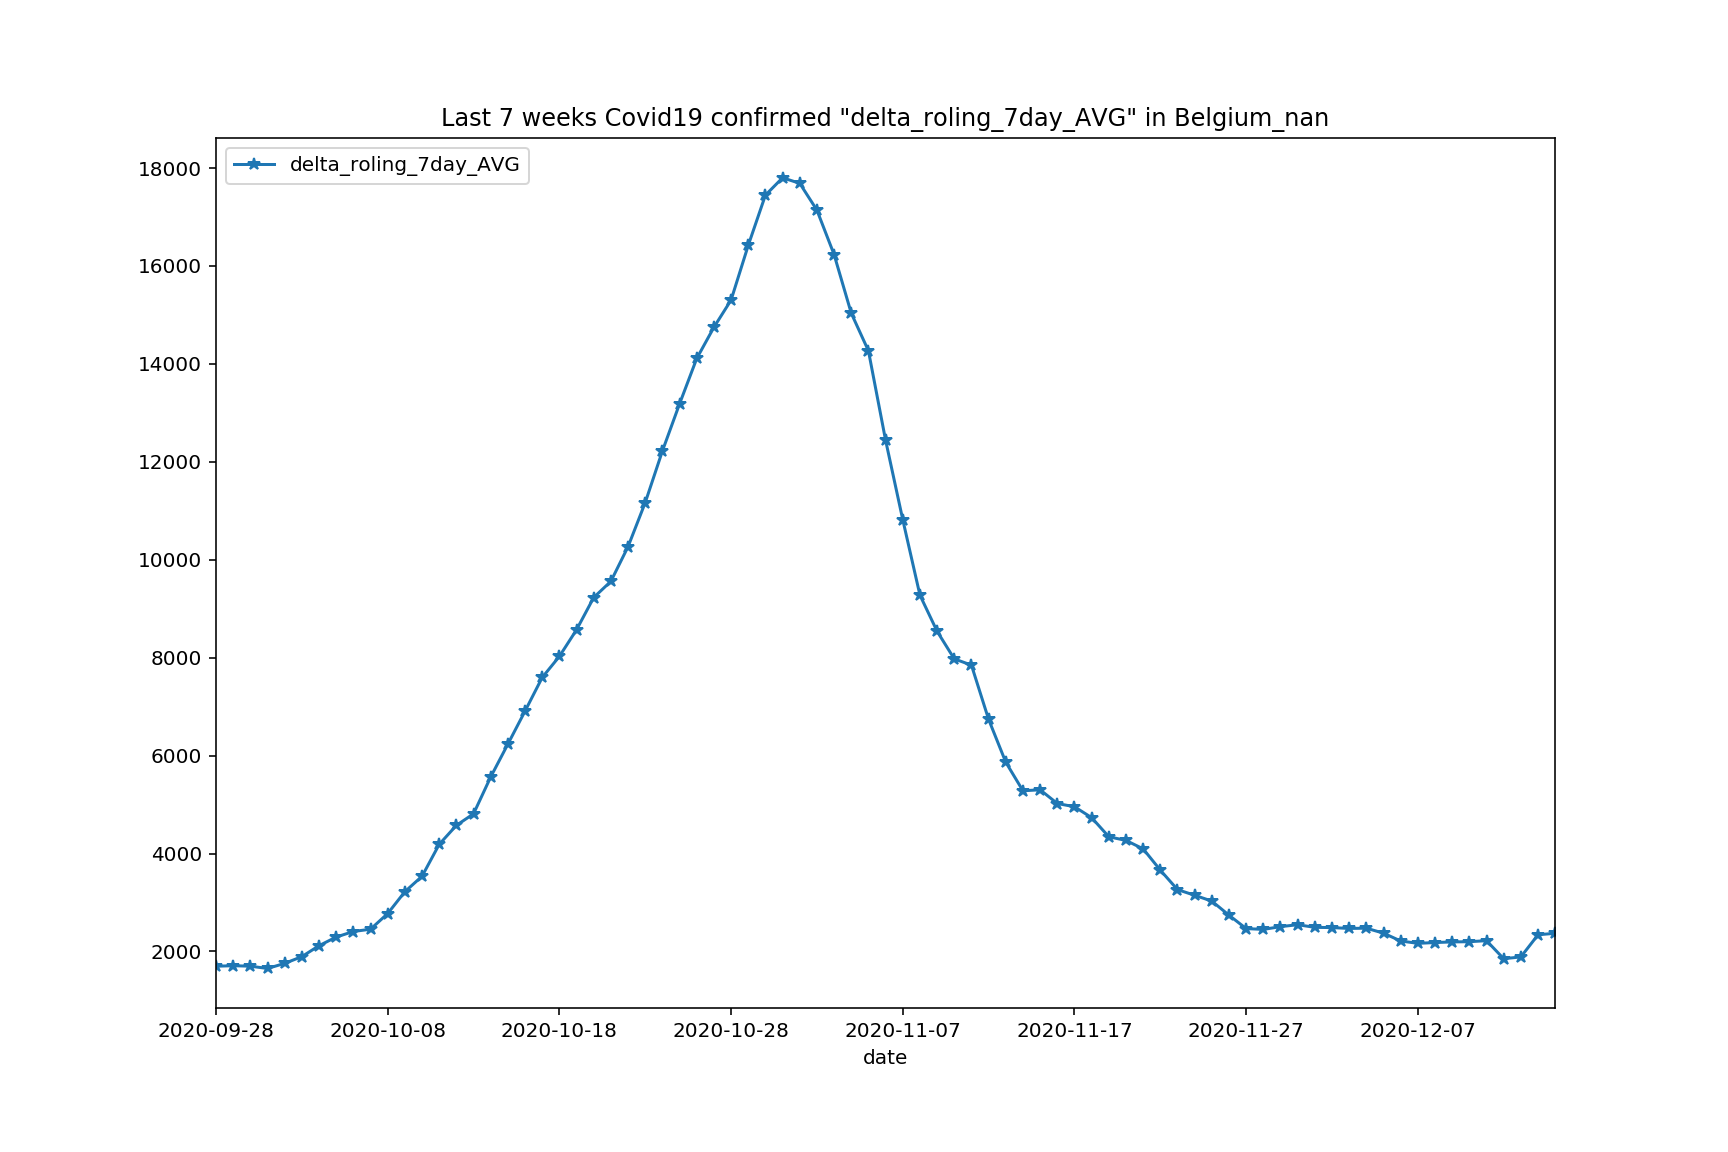

In [59]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


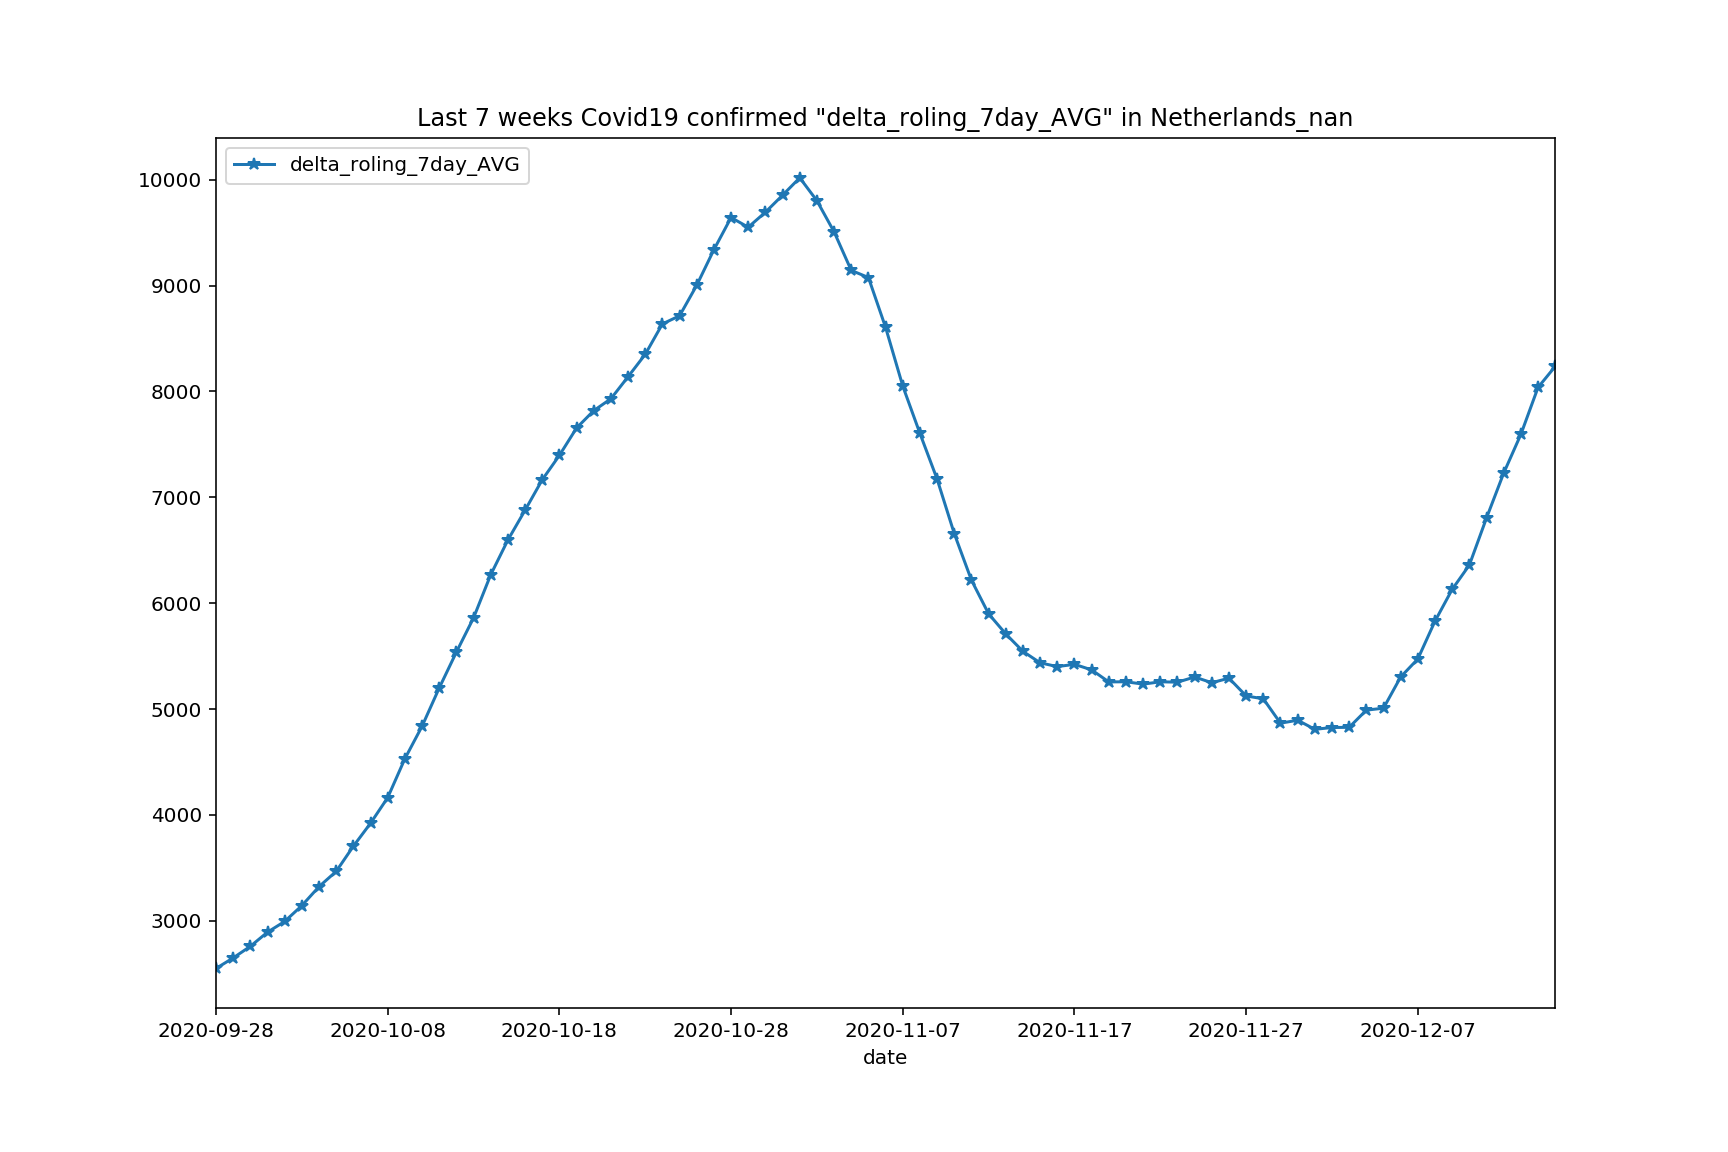

In [60]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


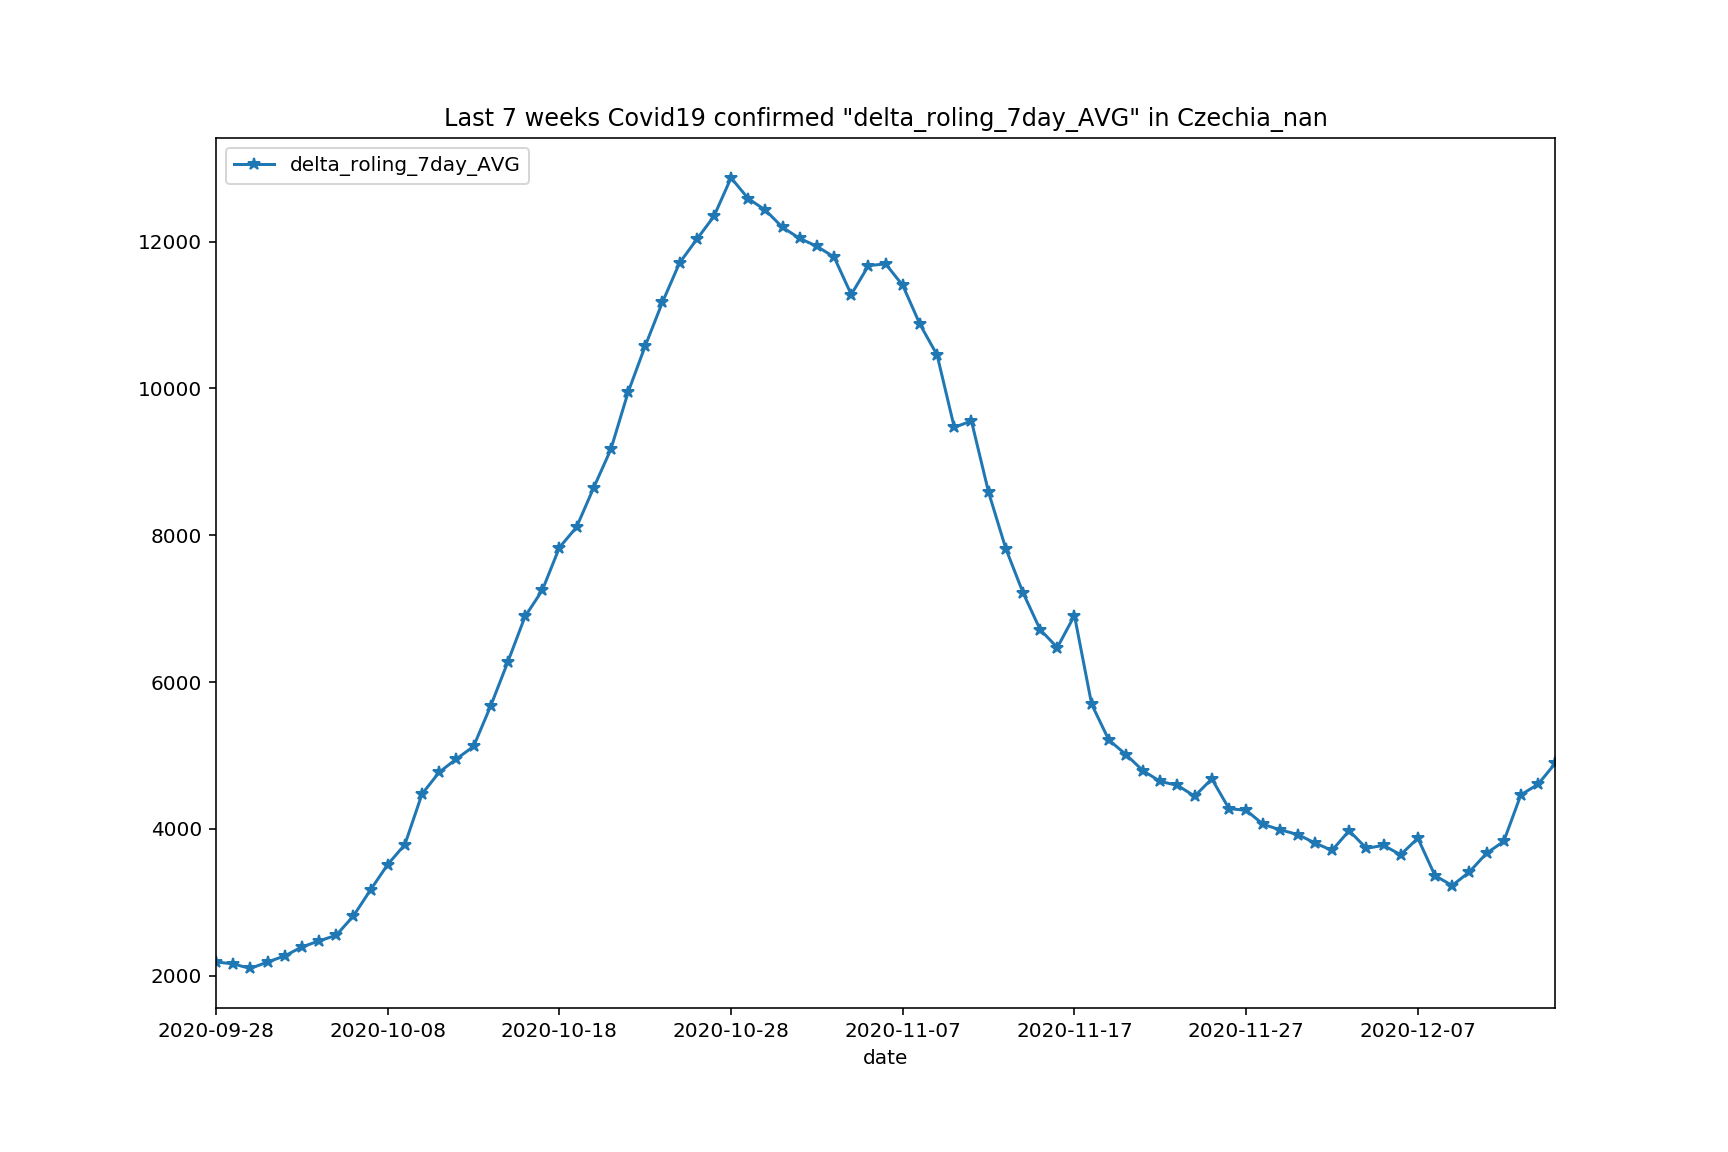

In [61]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


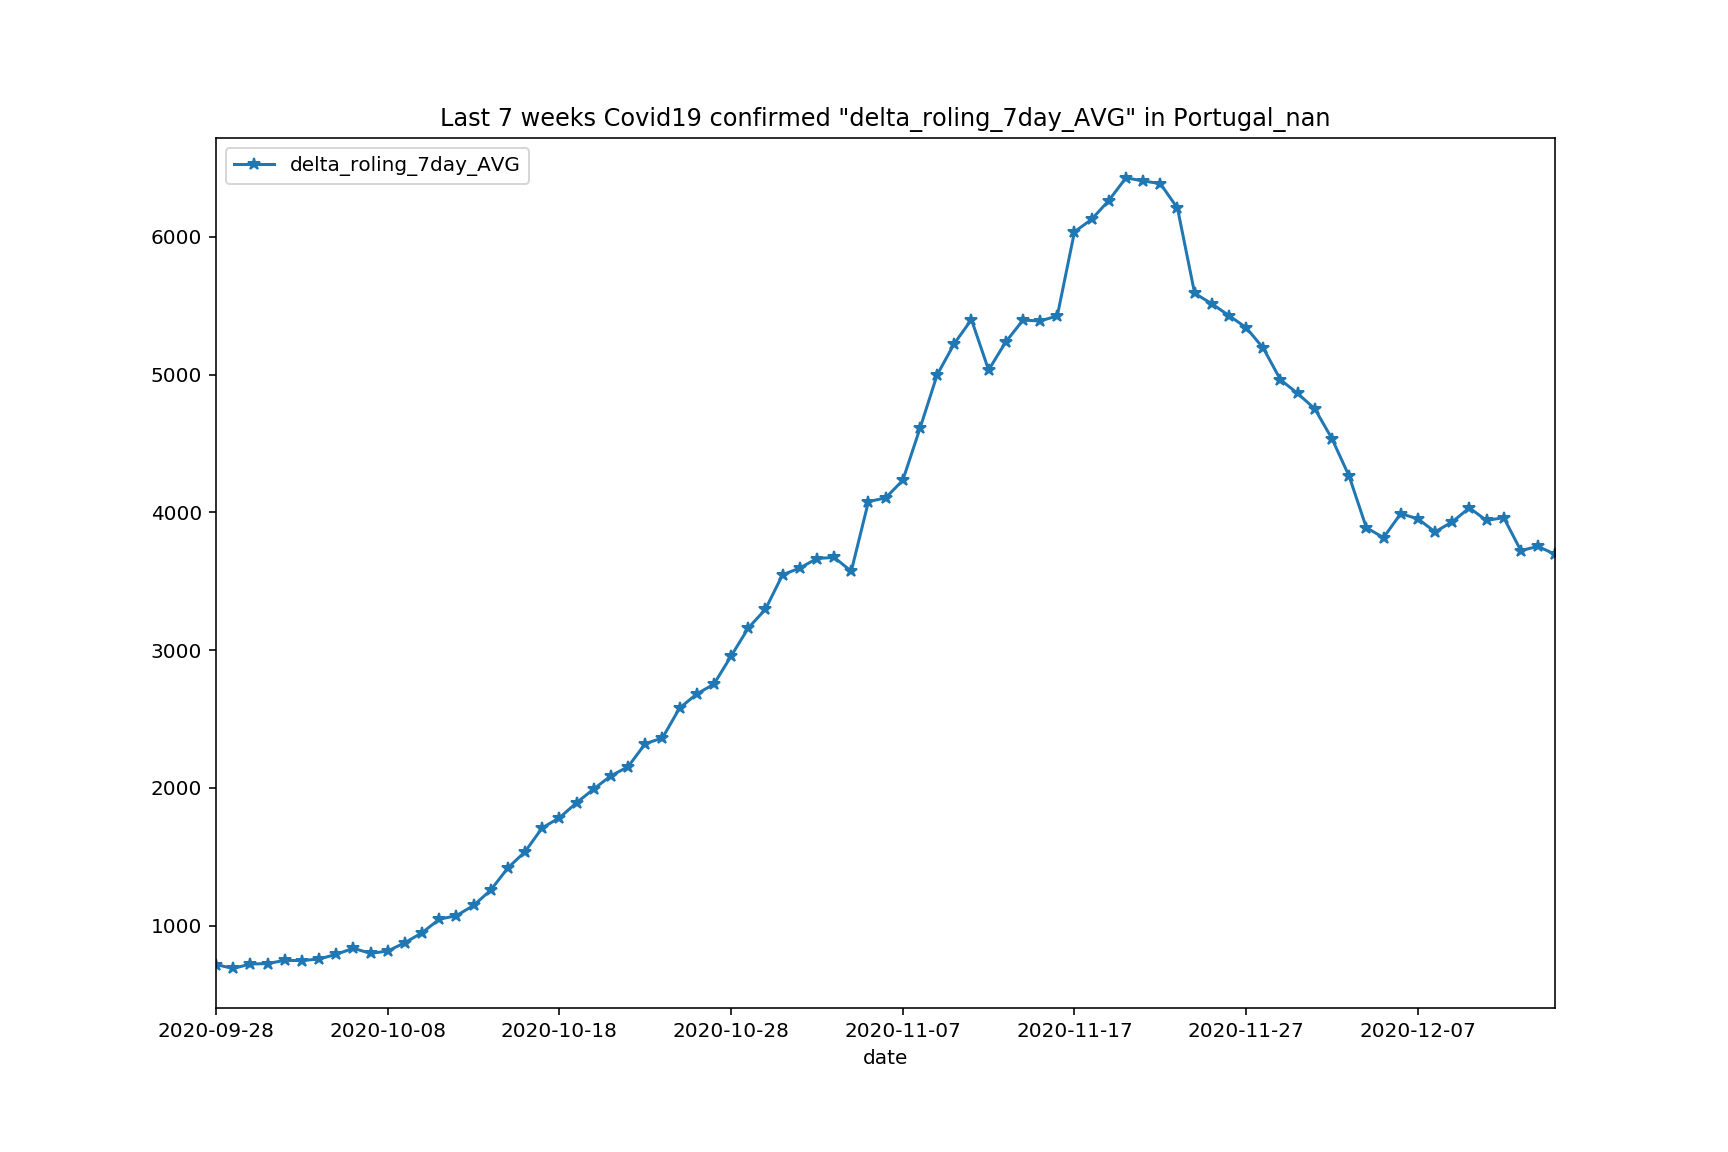

In [62]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [63]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [64]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
